In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

In [4]:
# import sklearn
import sklearn
print(sklearn.__version__)

1.3.1


In [5]:
# Libraries:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import linregress
from matplotlib import colors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.feature_selection import f_regression
import seaborn as sns
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import expon, reciprocal
from sklearn.inspection import permutation_importance

In [7]:
# read clean date:
path = "/content/drive/MyDrive/LWP_Netanel/Sg_clean_data.csv"
df = pd.read_csv(path, usecols=lambda column: column not in ["Unnamed: 0","Unnamed: 223"])

# Convert date ro datetime:
df['spectral_date'] = pd.to_datetime(df['spectral_date'])

df

,398,400,402,404,406,409,411,413,415,417,...,993,995,997,999,1001,LWP,spectral_date,treatment,plot,English_name
0,0.056127,0.050410,0.045164,0.040390,0.036088,0.032257,0.028898,0.026011,0.023595,0.021651,...,0.222754,0.225129,0.227839,0.230886,0.234268,-1.150,2022-03-14,drought,5,cypress
1,0.056986,0.051272,0.046001,0.041172,0.036785,0.032840,0.029338,0.026278,0.023660,0.021485,...,0.327153,0.330478,0.334300,0.338619,0.343433,-2.750,2022-03-14,drought,5,carob
2,0.058759,0.053196,0.048060,0.043349,0.039063,0.035203,0.031768,0.028759,0.026176,0.024018,...,0.271355,0.273903,0.276832,0.280141,0.283831,-2.350,2022-03-14,drought,6,carob
3,0.022455,0.019661,0.017084,0.014725,0.012584,0.010661,0.008955,0.007468,0.006198,0.005145,...,0.026978,0.027121,0.027282,0.027462,0.027660,-2.300,2022-03-14,control,1,pine
4,0.056687,0.051226,0.046198,0.041603,0.037441,0.033712,0.030417,0.027554,0.025125,0.023129,...,0.257415,0.260070,0.263109,0.266533,0.270341,-1.620,2022-03-14,drought,6,cypress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.037854,0.033429,0.029375,0.025693,0.022381,0.019441,0.016872,0.014674,0.012847,0.011391,...,0.254123,0.253133,0.252045,0.250859,0.249576,-0.875,2023-02-13,control,1,oak
242,0.042819,0.038807,0.035169,0.031907,0.029020,0.026507,0.024369,0.022606,0.021218,0.020205,...,0.281425,0.280196,0.278753,0.277096,0.275225,-1.261,2023-02-13,control,1,cypress
243,0.013891,0.012588,0.011396,0.010316,0.009346,0.008488,0.007741,0.007105,0.006580,0.006166,...,0.110415,0.109811,0.109198,0.108575,0.107943,-0.906,2023-02-13,drought,6,oak
244,0.049915,0.044643,0.039817,0.035437,0.031504,0.028017,0.024976,0.022381,0.020232,0.018530,...,0.240941,0.241184,0.241376,0.241517,0.241606,-1.960,2023-02-13,control,3,carob


In [8]:
df['spectral_date'].unique(),len(df['spectral_date'].unique())

(<DatetimeArray>
 ['2022-03-14 00:00:00', '2022-04-12 00:00:00', '2022-05-10 00:00:00',
  '2022-07-21 00:00:00', '2022-08-11 00:00:00', '2022-09-07 00:00:00',
  '2022-11-23 00:00:00', '2022-12-20 00:00:00', '2023-01-10 00:00:00',
  '2023-02-13 00:00:00']
 Length: 10, dtype: datetime64[ns],
 10)

In [9]:
def get_column_name_by_index(index):
    # Get the column names from the DataFrame
    column_names = df.columns.tolist()

    # Adjust the index to account for starting at 1
    adjusted_index = index - 1

    # Check if the adjusted index is within the valid range
    if adjusted_index < 0 or adjusted_index >= len(column_names):
        return "Invalid index"

    # Return the column name at the adjusted index
    return column_names[adjusted_index]

In [10]:
get_column_name_by_index(95),get_column_name_by_index(142)

('605', '709')

In [11]:
# Normalized index
def nvi_column(df,band1,band2):
  data = (df[str(band1)]-df[str(band2)])/(df[str(band1)]+df[str(band2)])
  return data

# fraction index
def frac_column(df,band1,band2):
  data = df[str(band1)]/df[str(band2)]
  return data

In [12]:
df["530-623"] = nvi_column(df,530,623)
df["680-750"] = nvi_column(df,681,751)
df["660-940"] = nvi_column(df,661,944)
df["519-750"] = nvi_column(df,519,749)
df["605-709"] = nvi_column(df,605,709)

## Ensemble NDSI

Average correlation: 0.55, r2: 0.31, rmse: 0.75
Median correlation: 0.54, r2: 0.29, rmse: 0.75


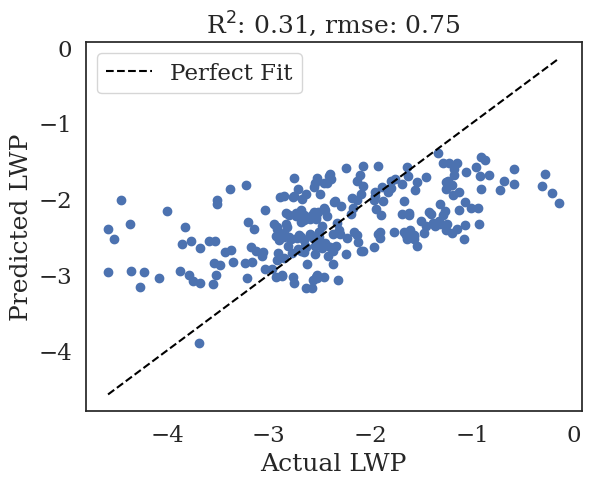

In [ ]:
models = {}
target_col = 'LWP'
for col in df[["530-623","680-750","660-940","519-750","605-709"]].columns:
    if col != target_col:
        lr = LinearRegression()
        lr.fit(df[[col]], df[target_col])
        models[col] = {'model': lr, 'slope': lr.coef_[0], 'intercept': lr.intercept_}

predictions = [model['model'].predict(df[[col]]) for col, model in models.items()]
average_pred = np.mean(predictions, axis=0)
median_pred = np.median(predictions, axis=0)

correlation_avg, _ = pearsonr(average_pred, df[target_col])
r2_avg = correlation_avg ** 2
rmse_avg = np.sqrt(mean_squared_error(average_pred, df[target_col]))

correlation_median, _ = pearsonr(median_pred, df[target_col])
r2_median = correlation_median ** 2
rmse_median = np.sqrt(mean_squared_error(median_pred, df[target_col]))

print(f"Average correlation: {correlation_avg:.2f}, r2: {r2_avg:.2f}, rmse: {rmse_avg:.2f}")
print(f"Median correlation: {correlation_median:.2f}, r2: {r2_median:.2f}, rmse: {rmse_median:.2f}")

plt.scatter(df[target_col], average_pred,)
# plt.scatter(df[target_col], median_pred, label='Median Predictions')
plt.plot([df[target_col].min(), df[target_col].max()], [df[target_col].min(), df[target_col].max()], color='Black', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual LWP')
plt.ylabel('Predicted LWP')
plt.legend()
plt.title(f"R$^2$: {r2_avg:.2f}, rmse: {rmse_avg:.2f}")
plt.show()

In [ ]:
# List of feature combinations
feature_combinations = [
    ["530-623"],
    ["530-623", "680-750"],
    ["530-623", "680-750", "660-940"],
    ["530-623", "680-750", "660-940", "519-750"],
    ["530-623", "680-750", "660-940", "519-750", "605-709"]
]

results = []

# Define 'y'
y = df['LWP']

# Loop through feature combinations
for features in feature_combinations:
    X_subset = df[features]
    lr = LinearRegression()
    lr.fit(X_subset, y)
    predictions = lr.predict(X_subset)

    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    # Add pvalue
    slope, intercept, r_value, p_value, std_err = linregress(y, predictions)


    results.append([", ".join(features), r2, rmse, mae, p_value])

# Create a DataFrame to store results
results_df = pd.DataFrame(results, columns=["Features", "R2", "RMSE", "MAE", "p-val"])

# Print the results table
results_df

,Features,R2,RMSE,MAE,p-val
0,530-623,0.307363,0.742912,0.581266,3.175007e-21
1,"530-623, 680-750",0.345473,0.722185,0.570192,3.009619e-24
2,"530-623, 680-750, 660-940",0.352535,0.718278,0.567420,7.932114e-25
3,"530-623, 680-750, 660-940, 519-750",0.352697,0.718188,0.567530,7.691505e-25
4,"530-623, 680-750, 660-940, 519-750, 605-709",0.394524,0.694597,0.546445,2.103387e-28


In [ ]:
# Define target variable
y = df['LWP']

# Step 1: Compute R² for each feature separately
individual_r2_scores = []
features = ["530-623", "680-750", "660-940", "519-750", "605-709"]

for feature in features:
    X = df[[feature]]
    lr = LinearRegression()
    lr.fit(X, y)
    predictions = lr.predict(X)
    r2 = r2_score(y, predictions)
    individual_r2_scores.append((feature, r2))

# Step 2: Rank features by R² in descending order
ranked_features = sorted(individual_r2_scores, key=lambda x: x[1], reverse=True)
sorted_features = [feature[0] for feature in ranked_features]

# Step 3: Build models incrementally using ranked features
results = []
selected_features = []

for feature in sorted_features:
    selected_features.append(feature)
    X_subset = df[selected_features]
    lr = LinearRegression()
    lr.fit(X_subset, y)
    predictions = lr.predict(X_subset)

    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    # Add p-value
    slope, intercept, r_value, p_value, std_err = linregress(y, predictions)

    results.append([", ".join(selected_features), r2, rmse, mae, p_value])

# Step 4: Create a results DataFrame
final_results_df = pd.DataFrame(results, columns=["NDSI", "R2", "RMSE", "MAE", "p-val"])

# Display the final results
final_results_df

,NDSI,R2,RMSE,MAE,p-val
0,680-750,0.331434,0.729889,0.581856,4.090143e-23
1,"680-750, 530-623",0.345473,0.722185,0.570192,3.009619e-24
2,"680-750, 530-623, 660-940",0.352535,0.718278,0.567420,7.932114e-25
3,"680-750, 530-623, 660-940, 519-750",0.352697,0.718188,0.567530,7.691505e-25
4,"680-750, 530-623, 660-940, 519-750, 605-709",0.394524,0.694597,0.546445,2.103387e-28


In [ ]:
# final_results_df.to_csv("results_ensemble.csv" )

Now with train/test split


In [ ]:
# Assuming X is your feature matrix
X = df[["530-623", "680-750", "660-940", "519-750", "605-709"]]

# List of feature combinations
feature_combinations = [
    ["530-623"],
    ["530-623", "680-750"],
    ["530-623", "680-750", "660-940"],
    ["530-623", "680-750", "660-940", "519-750"],
    ["530-623", "680-750", "660-940", "519-750", "605-709"]
]

results = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Loop through feature combinations
for features in feature_combinations:
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    lr = LinearRegression()
    lr.fit(X_train_subset, y_train)

    train_predictions = lr.predict(X_train_subset)
    test_predictions = lr.predict(X_test_subset)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Calculate RPD index for the test set
    rpd_index = y_test.std() / test_rmse

    results.append([", ".join(features), train_r2, test_r2, train_rmse, test_rmse, train_mae, test_mae, rpd_index])

# Create a DataFrame to store results
results_df = pd.DataFrame(results, columns=["Features", "Train R2", "Test R2", "Train RMSE", "Test RMSE", "Train MAE", "Test MAE", "RPD"])

# Print the results table
results_df

,Features,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE,RPD
0,530-623,0.274788,0.324527,0.724380,0.789884,0.569473,0.603053,1.225040
1,"530-623, 680-750",0.295006,0.387233,0.714211,0.752327,0.557434,0.590766,1.286194
2,"530-623, 680-750, 660-940",0.306609,0.383915,0.708309,0.754361,0.553209,0.594777,1.282727
3,"530-623, 680-750, 660-940, 519-750",0.313972,0.351006,0.704538,0.774247,0.556799,0.608552,1.249781
4,"530-623, 680-750, 660-940, 519-750, 605-709",0.403822,0.258829,0.656783,0.827405,0.517841,0.632598,1.169486


In [ ]:
results_df[["Features", "Test R2", "Test RMSE", "Test MAE", "RPD"]]

,Features,Test R2,Test RMSE,Test MAE,RPD
0,530-623,0.324527,0.789884,0.603053,1.225040
1,"530-623, 680-750",0.387233,0.752327,0.590766,1.286194
2,"530-623, 680-750, 660-940",0.383915,0.754361,0.594777,1.282727
3,"530-623, 680-750, 660-940, 519-750",0.351006,0.774247,0.608552,1.249781
4,"530-623, 680-750, 660-940, 519-750, 605-709",0.258829,0.827405,0.632598,1.169486


Coefficients: [ 6.26281393 -4.17906339  1.10836818 -4.71022993  8.7941756 ]
Intercept: -5.119876610366143
Root Mean Squared Error: 0.6945973594750839
Mean Absolute Error: 0.5464451715286114
R-squared: 0.39452401644145885
RPD Index: 1.2877633199455105


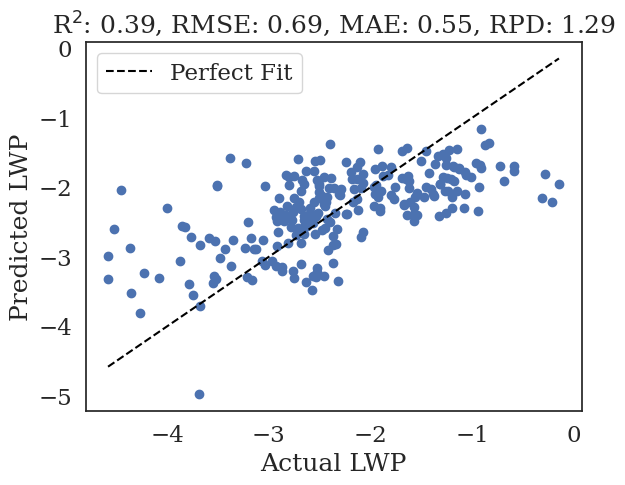

In [ ]:
# Initialize and fit the linear regression model
X = df[["530-623", "680-750", "660-940", "519-750", "605-709"]]
y = df[target_col]

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Get the model coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

# Make predictions
predictions = lr.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)
rpd_index = y.std() / rmse

# Print the coefficients, intercept, and evaluation metrics
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("RPD Index:", rpd_index)

# plot
plt.scatter(y, predictions)
# plt.scatter(df[target_col], median_pred, label='Median Predictions')
plt.plot([df[target_col].min(), df[target_col].max()], [df[target_col].min(), df[target_col].max()], color='Black', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual LWP')
plt.ylabel('Predicted LWP')
plt.legend()
plt.title(f"R$^2$: {r2:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, RPD: {rpd_index:.2f}")
plt.show()


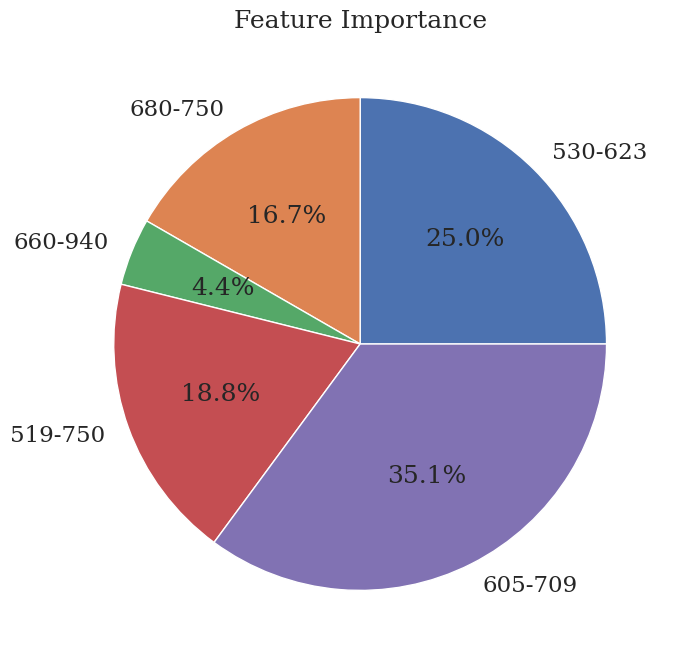

In [ ]:
# Calculate absolute values of coefficients for feature importance
importance = np.abs(coefficients)

# Get the feature names
feature_names = np.array(X.columns)

# Plot the feature importance in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(importance, labels=feature_names, autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()

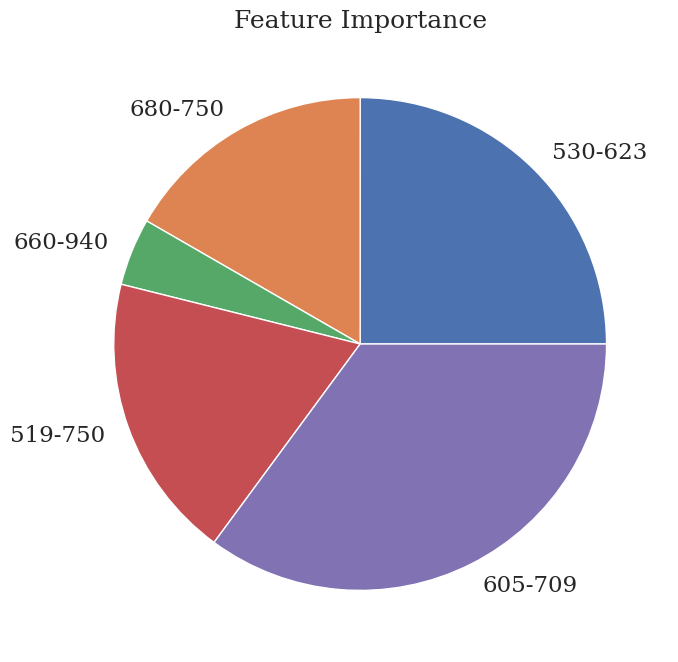

In [ ]:
# Plot the feature importance in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(importance, labels=feature_names, autopct=None)
plt.title('Feature Importance')
plt.show()

## ML  - bands data Reduce bands

In [13]:
# Create df for bands data only
df_bands = df[df.columns[:-8]]
df_bands.head()

# Define the number of contiguous columns to keep
n_cols = 12

# Calculate the number of contiguous blocks of columns
n_blocks = df_bands.shape[1] // n_cols

# Initialize an empty list to hold the column indices to keep
cols_to_keep = []

# Loop over each contiguous block of columns
for i in range(n_blocks):
    # Calculate the starting and ending indices of the current block
    start_idx = i * n_cols
    end_idx = start_idx + n_cols

    # Randomly select one column index from the current block
    rand_idx = np.random.randint(start_idx, end_idx)

    # Add the selected index to the list of columns to keep
    cols_to_keep.append(rand_idx)

# Create a new dataframe with only the selected columns
df_new = df_bands.iloc[:, cols_to_keep]

df_new

,409,446,471,499,524,530,557,599,621,645,...,743,789,802,844,862,893,913,948,973,988
0,0.032257,0.028986,0.035394,0.037640,0.046718,0.050996,0.061439,0.053737,0.050144,0.046225,...,0.199924,0.225117,0.226180,0.231375,0.230905,0.236622,0.230308,0.224508,0.219061,0.219013
1,0.032840,0.022354,0.023882,0.024657,0.035968,0.041568,0.052574,0.039587,0.036309,0.033028,...,0.260946,0.311283,0.313026,0.324468,0.327109,0.340198,0.335486,0.335565,0.323266,0.321991
2,0.035203,0.024465,0.026131,0.027063,0.037038,0.042137,0.054282,0.043985,0.040805,0.038233,...,0.222486,0.253662,0.255490,0.264941,0.266725,0.277141,0.274120,0.275535,0.268573,0.267401
3,0.010661,0.004489,0.004551,0.004748,0.006338,0.007067,0.008481,0.007172,0.006604,0.006324,...,0.024226,0.026849,0.027029,0.027342,0.027288,0.027201,0.026919,0.026770,0.026699,0.026748
4,0.033712,0.027735,0.033380,0.034980,0.044360,0.049146,0.060094,0.050844,0.047169,0.043398,...,0.216389,0.249984,0.250819,0.258436,0.259974,0.268859,0.262724,0.262886,0.253942,0.253260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.019441,0.014659,0.016393,0.017892,0.031316,0.037165,0.047546,0.032136,0.027341,0.024034,...,0.217664,0.249063,0.250490,0.257504,0.260801,0.259123,0.258715,0.269386,0.256673,0.255812
242,0.026507,0.029988,0.034320,0.036610,0.046049,0.049780,0.058944,0.049588,0.046100,0.043599,...,0.232497,0.268853,0.270903,0.283003,0.288745,0.283605,0.283666,0.284773,0.280722,0.283240
243,0.008488,0.007629,0.008003,0.008256,0.012754,0.014790,0.018238,0.012335,0.010614,0.009532,...,0.093813,0.110876,0.111849,0.114580,0.115662,0.115492,0.116781,0.127043,0.114184,0.111595
244,0.028017,0.023846,0.025601,0.026864,0.034304,0.038027,0.045884,0.037983,0.035260,0.033135,...,0.199512,0.236823,0.238654,0.247705,0.251957,0.249588,0.250755,0.247218,0.236201,0.240302


In [14]:
# Define features and labels
X = df[df.columns[:-8]].drop(columns = ['spectral_date'])

# Encode "English_name"
label_encoder = LabelEncoder()
X["English_name_encoded"] = label_encoder.fit_transform(df["English_name"])

# Print the mapping of the encoded values
english_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))

y = df['LWP']

# Split to train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape,X_test.shape

((172, 276), (74, 276))

#### SVR

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searche

param_distribs = {
        'kernel': ['rbf','linear'],
        'shrinking': [False,True],
        'C': reciprocal(10, 200),
        'epsilon': reciprocal(0.1, 1.0),
        'coef0': expon(scale=1.0),
        'gamma': expon(scale=1.0),
        'degree': [1,2,3,4,5,6],
        'tol': expon(scale=1e-4)
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=100, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

# # print the best parameters and the corresponding score
print("Best parameters: {}".format(rnd_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rnd_search.best_score_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.1s
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=39.58189513876492, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194617, gamma=3.503557475158312, kernel=linear, shrinking=True, tol=2.38687625248947e-05; total time=   0.0s
[CV] END C=39.58189513876492, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194617, gamma=3.503557475158312, kernel=linear, shrinki

In [ ]:
# Create the SVR model
svr = SVR (**rnd_search.best_params_)


# Fit the model to the training data
svr.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(svr, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.4514792033119082
MAE: 0.5401472003749636
RMSE: 0.6719220217494797
R2: 0.376020449022507


In [ ]:
y_test_pred = svr.predict(X_test)

# Calculate mean absolute error
mae_svr = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_svr)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_svr)

# Calculate root mean squared error
rmse_svr = mse_svr ** 0.5
print('Root Mean Squared Error:', rmse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_test_pred)
print('R-squared:', r2_svr)

# Calculate error score
error_svr = 100*rmse_svr/y_test.mean()
print('Error (%):', error_svr)

range_error_svr = 100*rmse_svr/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_svr)

# RPD score
RPD_svr  = y_test.std()/rmse_svr
print('RPD:', RPD_svr)

svr_prediction  = y_test_pred

Mean Absolute Error: 0.6196565660908789
Mean Squared Error: 0.7396112123209703
Root Mean Squared Error: 0.8600065187665558
R-squared: 0.199271460068432
Error (%): -40.20524634606645
Range Error (%): 21.04763873633274
RPD: 1.1251535007212727


#### XGB

In [15]:
# Define the parameter grid for the search
param_grid = {    'max_depth': [4, 5, 6,7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [i for i in range(100, 1400, 150)],
    'subsample': [i/10 for i in range(1, 10)],
    'colsample_bytree': [i/10 for i in range(1, 10)],
    'reg_alpha': [i/10 for i in range(1, 10)],
    'reg_lambda': [i/10 for i in range(1, 10)],
    'min_child_weight':[i for i in range(2,8)]
              }

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# # Perform the randomized search with cross-validation
search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, random_state=42)
search.fit(X_train, y_train)

# # Print the best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best parameters:  {'subsample': 0.3, 'reg_lambda': 0.7, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best score:  0.9728419339678954


In [16]:
xgb_model = XGBRegressor(**search.best_params_)

xgb_model.fit(X_train, y_train)
# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(xgb_model, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.019689005755216607
MAE: 0.0774598712477573
RMSE: 0.14031751763488623
R2: 0.9727882549623316


In [ ]:
y_test_pred = xgb_model.predict(X_test)

# Calculate mean absolute error
mae_xgb = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_xgb)

# Calculate mean squared error
mse_xgb = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_xgb)

# Calculate root mean squared error
rmse_xgb = mse_xgb ** 0.5
print('Root Mean Squared Error:', rmse_xgb)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_test_pred)
print('R-squared:', r2_xgb)

error_xgb = 100*rmse_xgb/y_test.mean()
print('Error (%):', error_xgb)

range_error_xgb = 100*rmse_xgb/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_xgb)

# RPD score
RPD_xgb  = y_test.std()/rmse_xgb
print('RPD:', RPD_xgb)

# for storing all predictions
xgb_prediction = y_test_pred

Mean Absolute Error: 0.5892538107665809
Mean Squared Error: 0.6364214265573023
Root Mean Squared Error: 0.7977602563159576
R-squared: 0.31098827170396925
Error (%): -37.29523780387826
Range Error (%): 19.524235347918687
RPD: 1.2129450390294525


In [ ]:
# Get feature importances
importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Calculate total importance
total_importance = sum(importance)

# Calculate feature importance percentages
importance_percentages = (importance / total_importance) * 100

# Create a dataframe of features above 0.5% importance
df_features = pd.DataFrame({'Feature': feature_names, 'Importance': importance_percentages})
df_features = df_features[df_features['Importance'] > 0.5]

# Sort the dataframe by importance in descending order
df_features = df_features.sort_values(by='Importance', ascending=False)

# Print the dataframe
print(df_features)

    Feature  Importance
99      617    3.266715
73      559    1.767926
115     652    1.605398
97      612    1.601982
75      563    1.550415
116     654    1.186558
238     924    1.137619
112     645    0.959408
192     822    0.953661
77      568    0.892522
87      590    0.887920
205     851    0.879278
130     685    0.807320
70      552    0.766445
224     893    0.765395
48      504    0.762295
101     621    0.758378
270     995    0.757061
56      521    0.743923
132     690    0.729263
92      601    0.709902
272     999    0.707115
225     895    0.664783
219     882    0.647922
32      468    0.646285
175     785    0.623009
266     986    0.621122
136     698    0.612268
208     858    0.597475
126     676    0.596348
26      455    0.588578
105     630    0.586456
212     866    0.582214
214     871    0.580438
12      424    0.576791
259     970    0.574222
138     703    0.573199
135     696    0.563996
106     632    0.545985
173     780    0.543449
234     915    0

#### RF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
fit_model = rf_random.fit(X_train,y_train)

# # print the selection of best estimator
print(fit_model.best_estimator_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits
RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=2000)


In [ ]:
rf_model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000).fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_rf)

# Calculate root mean squared error
rmse_rf = mse_rf ** 0.5
print('Root Mean Squared Error:', rmse_rf)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_test_pred)
print('R-squared:', r2_rf)

# Calculate error score
error_rf = 100*rmse_rf/y_test.mean()
print('Error (%):', error_rf)

range_error_rf = 100*rmse_rf/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_rf)

# RPD score
RPD_rf  = y_test.std()/rmse_rf
print('RPD:', RPD_rf)

rf_prediction  = y_test_pred

Mean Absolute Error: 0.6123691842514846
Mean Squared Error: 0.582175215580634
Root Mean Squared Error: 0.7630040731088098
R-squared: 0.38296439960649886
Error (%): -31.995592092691595
Range Error (%): 17.436107703583406
RPD: 1.2817381735104914


#### Avg

In [ ]:
# array of avg prediction:
average_pred = np.mean([rf_prediction,xgb_prediction ], axis=0)


# Random check
mean_absolute_error(((xgb_prediction+rf_prediction+svr_prediction)/3),average_pred)

0.08228430758576044

In [ ]:
# Calculate mean absolute error
avg_mae = mean_absolute_error(y_test, average_pred)
print('Mean Absolute Error:', avg_mae)

# Calculate mean squared error
avg_mse = mean_squared_error(y_test, average_pred)
print('Mean Squared Error:', avg_mse)

# Calculate root mean squared error
avg_rmse = avg_mse ** 0.5
print('Root Mean Squared Error:', avg_rmse)

# Calculate R-squared score
avg_r2 = r2_score(y_test, average_pred)
print('R-squared:', avg_r2)

# Calculate Rrmse score:
avg_Rrmse = 100*avg_rmse/y_test.mean()
print('Rrmse:',avg_Rrmse)
avg_range_rrmse = 100*avg_rmse/(y_test.max()-y_test.min())
print('Range rRMSE:',avg_range_rrmse)

# RPD score
RPD_avg  = y_test.std()/avg_rmse
print('RPD:', RPD_avg)

Mean Absolute Error: 0.5980729582631243
Mean Squared Error: 0.5538894952883259
Root Mean Squared Error: 0.7442375261220882
R-squared: 0.4129438558527079
Rrmse: -31.208641139823158
Range rRMSE: 17.007256081400552
RPD: 1.3140582310372781


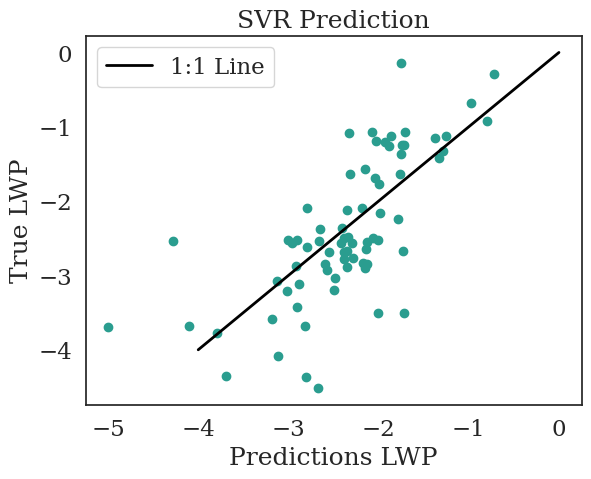

In [ ]:
# Plot the predictions against the true values
plt.scatter(svr_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('SVR Prediction')
plt.legend()
plt.show()

In [ ]:
models = ['Random_Forest','SVR','XGBoost','Avg']
maes = [mae_rf,mae_svr,mae_xgb,avg_mae]
mses = [mse_rf,mse_svr,mse_xgb,avg_mse]
rmses = [rmse_rf,rmse_svr,rmse_xgb,avg_rmse]
r2s = [r2_rf,r2_svr,r2_xgb,avg_r2]
rpds = [RPD_rf,RPD_svr,RPD_xgb,RPD_avg]
errors = [error_rf,error_svr,error_xgb,avg_Rrmse]
range_errors = [range_error_svr,range_error_rf,range_error_xgb,avg_range_rrmse]

df_bands_results = pd.DataFrame({'MAE': maes, 'MSE': mses, 'RMSE': rmses, 'R$^2$':r2s,'RPD':rpds, 'Error (%)':errors,'Range Error (%)':range_errors}, index=models)
df_bands_results

,MAE,MSE,RMSE,R$^2$,RPD,Error (%),Range Error (%)
Random_Forest,0.612369,0.582175,0.763004,0.382964,1.281738,-31.995592,15.797641
SVR,0.533002,0.477902,0.691305,0.493481,1.414675,-28.988975,17.436108
XGBoost,0.594267,0.534537,0.731120,0.433455,1.337634,-30.658584,16.707500
Avg,0.598073,0.553889,0.744238,0.412944,1.314058,-31.208641,17.007256


In [ ]:
# Load the data
data = X_test  # Replace X_test with your actual test data

# Create a list of the unique English_name_encoded and treatment_encoded values
english_name_encoded = data['English_name_encoded'].unique()

# Create a dictionary to store the results
results_english_name = {}

# Loop over each of the English_name_encoded values
for english_name_encoded in english_name_encoded:
    # Create a subset of the data for the current English_name_encoded value
    data_subset = data[data['English_name_encoded'] == english_name_encoded]

    # Get the predictions for the current English_name_encoded value
    predictions = svr.predict(data_subset)

    # Calculate the mean squared error for the current English_name_encoded value
    rmse = np.sqrt(np.mean((predictions - y_test[data_subset.index]) ** 2))

    # Calculate the R2 score for the current English_name_encoded value
    true_values = y_test[data_subset.index]
    r2 = r2_score(true_values, predictions)

    # Store the results for the current English_name_encoded value in the dictionary
    results_english_name[english_name_mapping[english_name_encoded]] = {'rmse': rmse, 'r2': r2}

# Extract the names, RMSE, and R2 values for plotting
names_english_name = list(results_english_name.keys())
rmse_values_english_name = [result['rmse'] for result in results_english_name.values()]
r2_values_english_name = [result['r2'] for result in results_english_name.values()]
# replace negative with 0
# r2_values_english_name = [0 if x < 0 else x for x in r2_values_english_name]

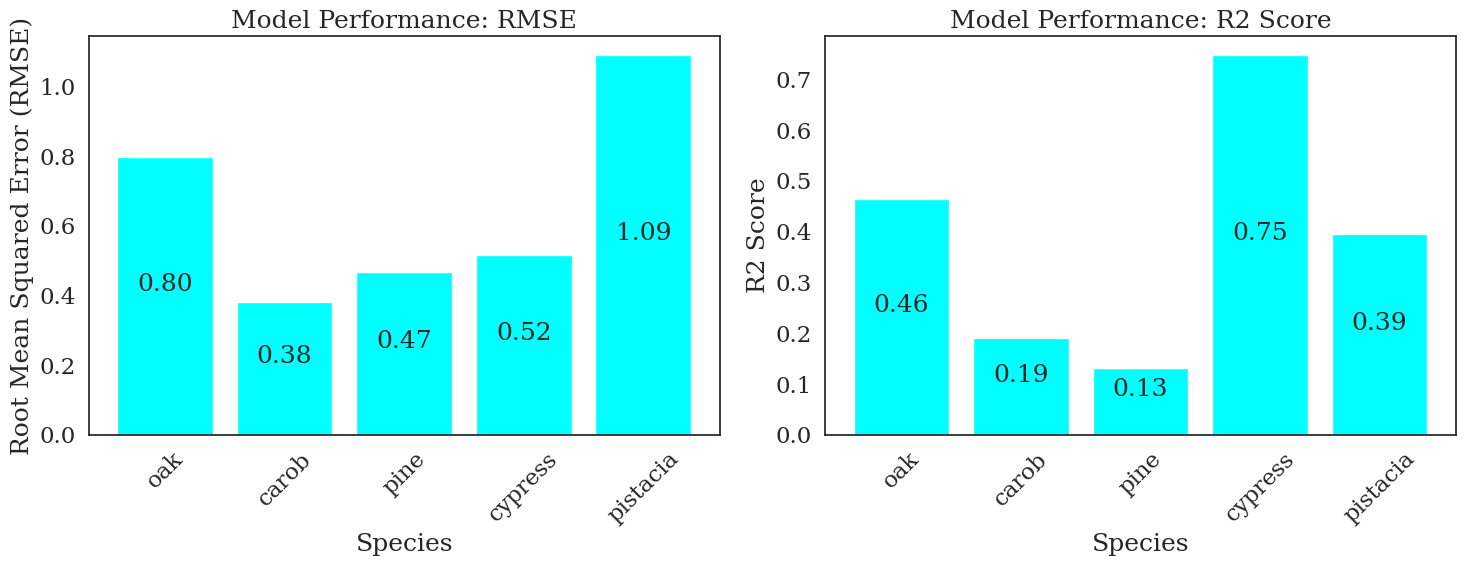

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the MSE values for English_name
mse_plot = axes[0].bar(names_english_name, rmse_values_english_name,color="cyan")
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')
axes[0].set_title('Model Performance: RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Add text values for MSE - English Name
for rect in mse_plot:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(names_english_name, r2_values_english_name,color="cyan")
axes[1].set_xlabel('Species')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('Model Performance: R2 Score')
axes[1].tick_params(axis='x', rotation=45)

# Add text values for R2 - English Name
for rect in r2_plot:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.utils.fixes import loguniform

# create a parameter grid: map the parameter names to the values that should be searche
param_dist = {
    "hidden_layer_sizes": [(100,), (200,), (300,), (400,), (500,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": loguniform(1e-6, 1.0),
    "batch_size": [16, 32, 64, 128],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": loguniform(1e-4, 1e-2),
    "power_t": loguniform(0.1, 1.0),
    "max_iter": [200, 400, 600, 800, 1000],
    "shuffle": [True, False],
    "tol": loguniform(1e-5, 1e-2),
    "warm_start": [True, False],
    "momentum": np.linspace(0.1, 0.9, 20),
    "nesterovs_momentum": [True, False],
    "early_stopping": [True, False],
    "validation_fraction": loguniform(0.1, 0.3),
    "beta_1": np.linspace(0.1, 0.9, 20),
    "beta_2": np.linspace(0.1, 0.9, 20),
    "epsilon": loguniform(1e-8, 1e-4),
    "n_iter_no_change": [10, 20, 30],
    "max_fun": [15000],
}

mlp_regressor = MLPRegressor()
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(mlp_regressor, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, error_score='raise')
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'identity', 'alpha': 0.14130347061831, 'batch_size': 128, 'beta_1': 0.22631578947368422, 'beta_2': 0.8578947368421053, 'early_stopping': False, 'epsilon': 1.1178209200698705e-06, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.00022321987366901572, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.39473684210526316, 'n_iter_no_change': 30, 'nesterovs_momentum': False, 'power_t': 0.6881927703162454, 'shuffle': True, 'solver': 'lbfgs', 'tol': 2.1898812429056927e-05, 'validation_fraction': 0.27617920770277227, 'warm_start': False}
Best Score: 0.9999968115154794


In [ ]:
# Create the SVR model
ann = MLPRegressor(**random_search.best_params_)


# Fit the model to the training data
ann.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(ann, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 3.1168612059658233e-06
MAE: 0.001408645917260137
RMSE: 0.0017654634535911027
R2: 0.9999956922541692


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_test_pred = ann.predict(X_test)

# Calculate mean absolute error
mae_ann = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_ann)

# Calculate mean squared error
mse_ann = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_ann)

# Calculate root mean squared error
rmse_ann = mse_ann ** 0.5
print('Root Mean Squared Error:', rmse_ann)

# Calculate R-squared score
r2_ann = r2_score(y_test, y_test_pred)
print('R-squared:', r2_ann)

# Calculate error score
error_ann = 100*rmse_ann/y_test.mean()
print('Error (%):', error_ann)

range_error_ann = 100*rmse_ann/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_ann)

# RPD score
RPD_ann  = y_test.std()/rmse_ann
print('RPD:', RPD_ann)

ann_prediction  = y_test_pred

Mean Absolute Error: 0.0019478219212684007
Mean Squared Error: 5.552768485832408e-06
Root Mean Squared Error: 0.0023564313030157292
R-squared: 0.9999939883818306
Error (%): -0.11016300338189257
Range Error (%): 0.05767085910464339
RPD: 410.6376213874486


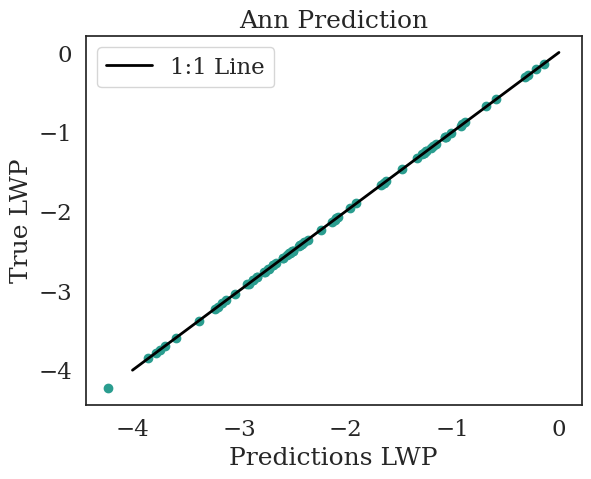

In [ ]:
# Plot the predictions against the true values
plt.scatter(ann_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('Ann Prediction')
plt.legend()
plt.show()

In [ ]:
# Load the data
data = X_test  # Replace X_test with your actual test data

# Create a list of the unique English_name_encoded and treatment_encoded values
english_name_encoded = data['English_name_encoded'].unique()

# Create a dictionary to store the results
results_english_name = {}

# Loop over each of the English_name_encoded values
for english_name_encoded in english_name_encoded:
    # Create a subset of the data for the current English_name_encoded value
    data_subset = data[data['English_name_encoded'] == english_name_encoded]

    # Get the predictions for the current English_name_encoded value
    predictions = ann.predict(data_subset)

    # Calculate the mean squared error for the current English_name_encoded value
    rmse = np.sqrt(np.mean((predictions - y_test[data_subset.index]) ** 2))

    # Calculate the R2 score for the current English_name_encoded value
    true_values = y_test[data_subset.index]
    r2 = r2_score(true_values, predictions)

    # Store the results for the current English_name_encoded value in the dictionary
    results_english_name[english_name_mapping[english_name_encoded]] = {'rmse': rmse, 'r2': r2}

# Extract the names, RMSE, and R2 values for plotting
names_english_name = list(results_english_name.keys())
rmse_values_english_name = [result['rmse'] for result in results_english_name.values()]
r2_values_english_name = [result['r2'] for result in results_english_name.values()]

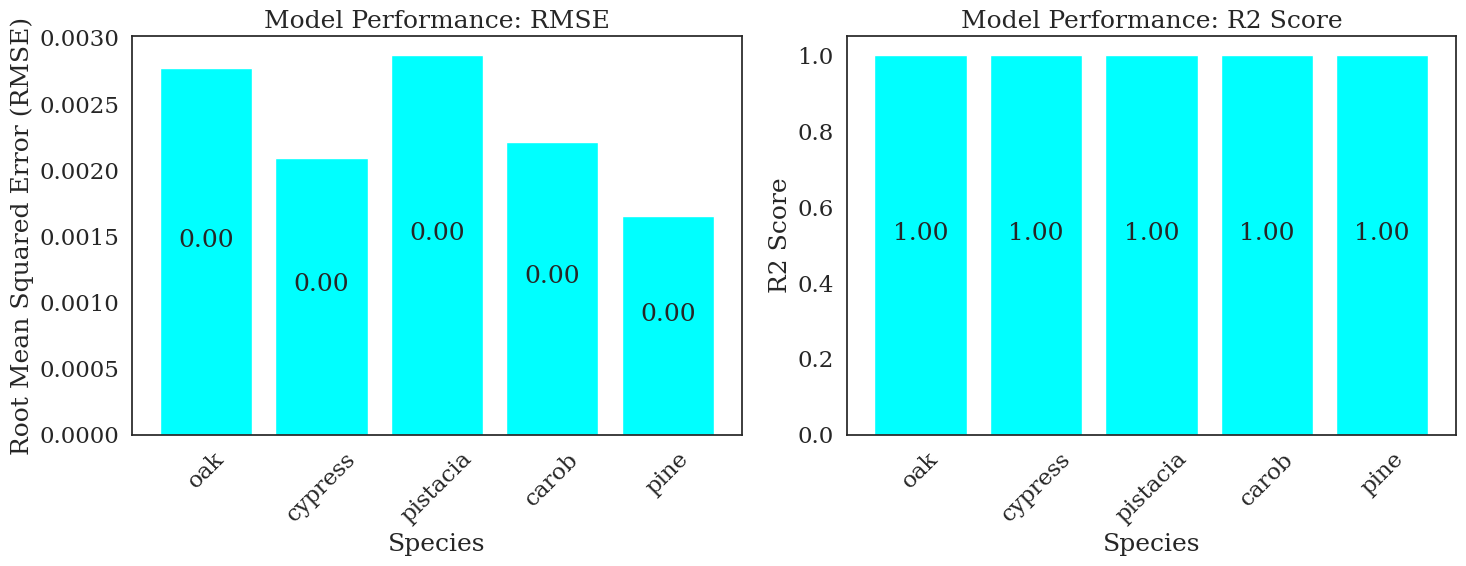

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the MSE values for English_name
mse_plot = axes[0].bar(names_english_name, rmse_values_english_name,color="cyan")
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')
axes[0].set_title('Model Performance: RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Add text values for MSE - English Name
for rect in mse_plot:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(names_english_name, r2_values_english_name,color="cyan")
axes[1].set_xlabel('Species')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('Model Performance: R2 Score')
axes[1].tick_params(axis='x', rotation=45)

# Add text values for R2 - English Name
for rect in r2_plot:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## ML  - NDSI data LWP

In [ ]:
X = df[["530-623","680-750","660-940","519-750","605-709"]]
y = df['LWP']


# Split to train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train.shape,X_val.shape,X_test.shape
X_train.shape,X_test.shape

((172, 5), (74, 5))

#### SVR

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched


param_distribs = {
        'kernel': ['rbf','linear'],
        'shrinking': [False,True],
        'C': reciprocal(10, 200),
        'epsilon': reciprocal(0.1, 1.0),
        'coef0': expon(scale=1.0),
        'gamma': expon(scale=1.0),
        'degree': [1,2,3,4,5,6],
        'tol': expon(scale=1e-4)
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

# # print the best parameters and the corresponding score
print("Best parameters: {}".format(rnd_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=30.710573677773706, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=39.58189513876492, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194621, gamma=3.503557475158312, kernel=linear, shrinking=True, tol=2.38687625248947e-05; total time=   0.0s
[CV] END C=39.58189513876492, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194621, gamma=3.503557475158312, kernel=linear, shrinkin

In [ ]:
refined_param_distribs = {
    'kernel': [rnd_search.best_params_['kernel']],
    'shrinking': [rnd_search.best_params_['shrinking']],
    'C': uniform(loc=rnd_search.best_params_['C']-10, scale=20),
    'epsilon': uniform(loc=rnd_search.best_params_['epsilon']-0.2, scale=0.4),
    'coef0': uniform(loc=rnd_search.best_params_['coef0']-0.5, scale=1.0),
    'gamma': uniform(loc=rnd_search.best_params_['gamma']-0.5, scale=1.0),
    'degree': [rnd_search.best_params_['degree']],
    'tol': uniform(loc=rnd_search.best_params_['tol']-1e-5, scale=2e-5)
}

refined_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=refined_param_distribs,
                                        n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                        verbose=2, random_state=42)
refined_rnd_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters after refinement: {}".format(refined_rnd_search.best_params_))
print("Best cross-validation score after refinement: {:.2f}".format(refined_rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=81.11163185689296, coef0=1.25550833563103, degree=2, epsilon=0.7375027505432669, gamma=1.7599866832840654, kernel=rbf, shrinking=True, tol=0.00023758196899251237; total time=   0.0s
[CV] END C=81.11163185689296, coef0=1.25550833563103, degree=2, epsilon=0.7375027505432669, gamma=1.7599866832840654, kernel=rbf, shrinking=True, tol=0.00023758196899251237; total time=   0.0s
[CV] END C=81.11163185689296, coef0=1.25550833563103, degree=2, epsilon=0.7375027505432669, gamma=1.7599866832840654, kernel=rbf, shrinking=True, tol=0.00023758196899251237; total time=   0.0s
[CV] END C=76.74071988666977, coef0=0.3628776413893131, degree=2, epsilon=0.7911756321286789, gamma=1.7624432108302375, kernel=rbf, shrinking=True, tol=0.00024862304773958454; total time=   0.0s
[CV] END C=76.74071988666977, coef0=0.3628776413893131, degree=2, epsilon=0.7911756321286789, gamma=1.7624432108302375, kernel=rbf, shrinking=True, tol=0.0002486230

In [ ]:
# Create the SVR model
svr = SVR (**refined_rnd_search.best_params_)


# Fit the model to the training data
svr.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(svr, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.4318930224545583
MAE: 0.5204249083570643
RMSE: 0.657185683391352
R2: 0.4030900820135308


In [ ]:
y_test_pred = svr.predict(X_test)

# Calculate mean absolute error
mae_svr = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_svr)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_svr)

# Calculate root mean squared error
rmse_svr = mse_svr ** 0.5
print('Root Mean Squared Error:', rmse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_test_pred)
print('R-squared:', r2_svr)

# Calculate pvalue
slope, intercept, r_value, pvalue_svr, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_svr)

# Calculate error score
error_svr = 100*rmse_svr/y_test.mean()
print('Error (%):', error_svr)

range_error_svr = 100*rmse_svr/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_svr)

# RPD score
RPD_svr  = y_test.std()/rmse_svr
print('RPD:', RPD_svr)

svr_prediction  = y_test_pred

Mean Absolute Error: 0.5757336201444928
Mean Squared Error: 0.5987218458021529
Root Mean Squared Error: 0.7737711843963646
R-squared: 0.3518031346363103
p-value: 2.740300584057578e-09
Error (%): -36.173750320825185
Range Error (%): 18.93713128723359
RPD: 1.2505497293598253


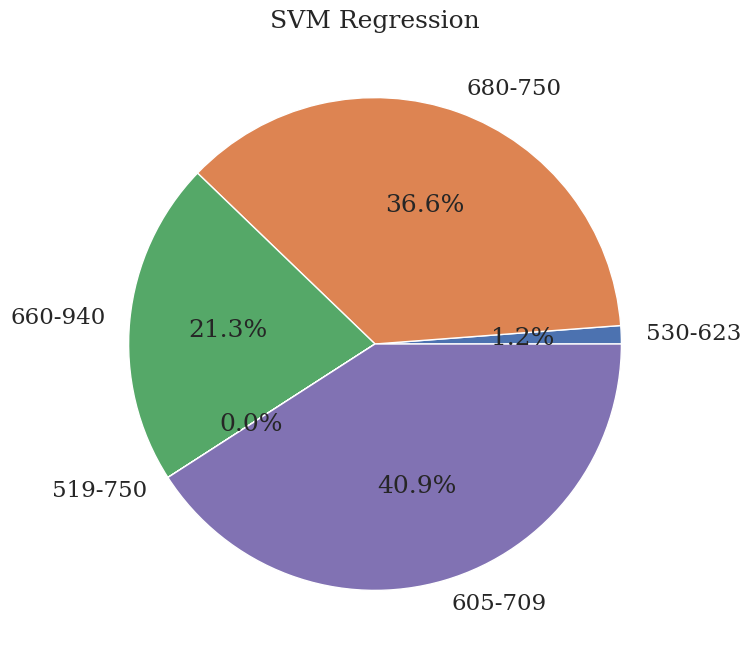

In [ ]:
result_svr = permutation_importance(svr, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
importance_svr = np.abs(result_svr.importances_mean)

# Normalize the importance values
importance_normalized_svr = importance_svr / np.sum(importance_svr)

# Get the feature names and colors based on the order of X_test columns
feature_names_svr = np.array(X_test.columns)

# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_svr, labels=feature_names_svr, autopct='%1.1f%%')
plt.title('SVM Regression')
plt.show()

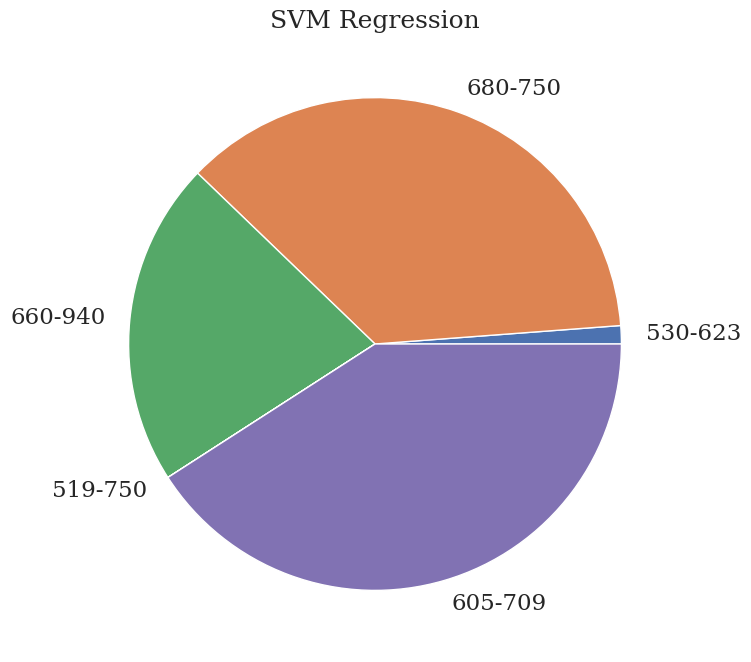

In [ ]:
# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_svr, labels=feature_names_svr, autopct=None)
plt.title('SVM Regression')
plt.show()

#### XGB

In [ ]:
# Define the parameter grid for the search
param_grid = {    'max_depth': [4, 5, 6,7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [i for i in range(100, 1400, 150)],
    'subsample': [i/10 for i in range(1, 10)],
    'colsample_bytree': [i/10 for i in range(1, 10)],
    'reg_alpha': [i/10 for i in range(1, 10)],
    'reg_lambda': [i/10 for i in range(1, 10)],
    'min_child_weight':[i for i in range(2,8)]
              }

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# # Perform the randomized search with cross-validation
search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, random_state=42)
search.fit(X_train, y_train)

# # Print the best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best parameters:  {'subsample': 0.2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'n_estimators': 1150, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Best score:  0.35386570671724454


In [ ]:
refined_param_grid = {
    'max_depth': [search.best_params_['max_depth']-1, search.best_params_['max_depth'], search.best_params_['max_depth']+1],
    'learning_rate': [search.best_params_['learning_rate']*0.9, search.best_params_['learning_rate'], search.best_params_['learning_rate']*1.1],
    'n_estimators': [search.best_params_['n_estimators']-100, search.best_params_['n_estimators'], search.best_params_['n_estimators']+100],
    'subsample': [search.best_params_['subsample']*0.9, search.best_params_['subsample'], search.best_params_['subsample']*1.1],
    'colsample_bytree': [search.best_params_['colsample_bytree']*0.9, search.best_params_['colsample_bytree'], search.best_params_['colsample_bytree']*1.1],
    'reg_alpha': [search.best_params_['reg_alpha']*0.9, search.best_params_['reg_alpha'], search.best_params_['reg_alpha']*1.1],
    'reg_lambda': [search.best_params_['reg_lambda']*0.9, search.best_params_['reg_lambda'], search.best_params_['reg_lambda']*1.1],
    'min_child_weight': [search.best_params_['min_child_weight']-1, search.best_params_['min_child_weight'], search.best_params_['min_child_weight']+1]
}

refined_search = RandomizedSearchCV(xgb_model, refined_param_grid, cv=3, n_iter=10, random_state=42)
refined_search.fit(X_train, y_train)

# Print the best parameters and score after refinement
print("Best parameters after refinement: ", refined_search.best_params_)
print("Best score after refinement: ", refined_search.best_score_)


Best parameters after refinement:  {'subsample': 0.18000000000000002, 'reg_lambda': 0.8800000000000001, 'reg_alpha': 0.8, 'n_estimators': 1250, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9900000000000001}
Best score after refinement:  0.3627414102418876


In [ ]:
xgb_model = XGBRegressor(**refined_search.best_params_)

xgb_model.fit(X_train, y_train)
# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(xgb_model, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.45754186852089956
MAE: 0.5349677208412525
RMSE: 0.6764184123165924
R2: 0.3676413717868723


In [ ]:
y_test_pred = xgb_model.predict(X_test)

# Calculate mean absolute error
mae_xgb = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_xgb)

# Calculate mean squared error
mse_xgb = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_xgb)

# Calculate root mean squared error
rmse_xgb = mse_xgb ** 0.5
print('Root Mean Squared Error:', rmse_xgb)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_test_pred)
print('R-squared:', r2_xgb)

# Calculate pvalue
slope, intercept, r_value, pvalue_xgb, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_xgb)

error_xgb = 100*rmse_xgb/y_test.mean()
print('Error (%):', error_xgb)

range_error_xgb = 100*rmse_xgb/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_xgb)

# RPD score
RPD_xgb  = y_test.std()/rmse_xgb
print('RPD:', RPD_xgb)

# for storing all predictions
xgb_prediction = y_test_pred

Mean Absolute Error: 0.5905546448424056
Mean Squared Error: 0.5697367412266396
Root Mean Squared Error: 0.7548090760097149
R-squared: 0.3831834058921798
p-value: 5.661992405799529e-10
Error (%): -35.28727304153725
Range Error (%): 18.473056192112455
RPD: 1.2819656996557511


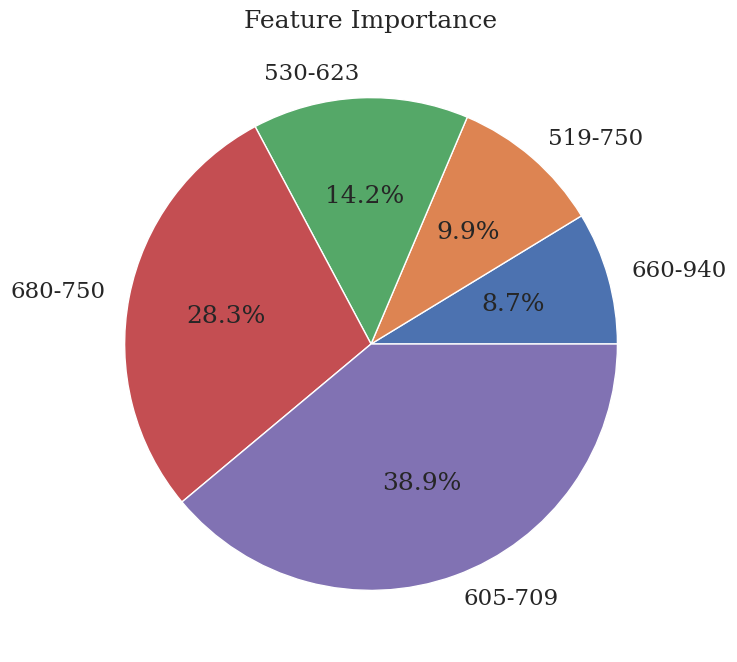

In [ ]:
# Generate feature importance using permutations
result = permutation_importance(xgb_model, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean

# Normalize the importance values
importance_normalized = importance / np.sum(importance)

# Sort the features based on importance
sorted_indices = np.argsort(importance_normalized)

# Get the feature names
feature_names = np.array(X_train.columns)  # Replace with your actual feature names

# Plot the feature importance in a pie graph
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized[sorted_indices], labels=feature_names[sorted_indices], autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()

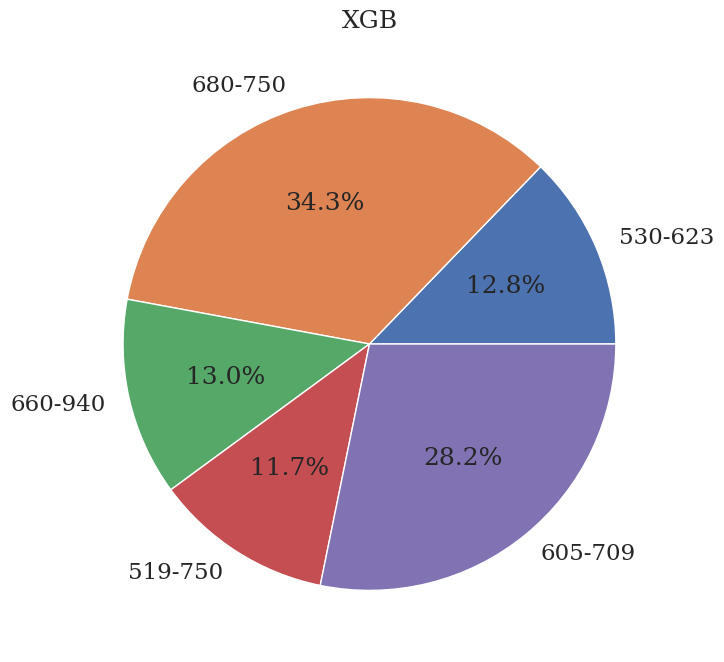

In [ ]:
# Assuming you have trained your XGBoost model and have the predictions
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate permutation importance
result_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
importance_xgb = result_xgb.importances_mean

# Normalize the importance values
importance_normalized_xgb = importance_xgb / np.sum(importance_xgb)

# Get the feature names and colors based on the order of X_test columns
feature_names_xgb = np.array(X_test.columns)

# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_xgb, labels=feature_names_xgb, autopct='%1.1f%%')
plt.title('XGB')
plt.show()

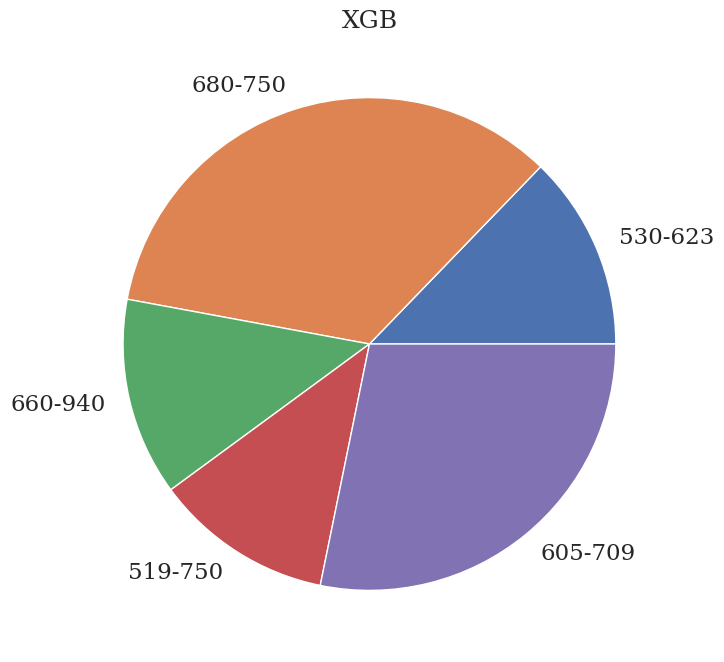

In [ ]:
# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_xgb, labels=feature_names_xgb, autopct=None)
plt.title('XGB')
plt.show()

#### RF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
fit_model = rf_random.fit(X_train,y_train)

# # print the selection of best estimator
print(fit_model.best_estimator_)

In [ ]:
rf_model = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=400).fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_rf)

# Calculate root mean squared error
rmse_rf = mse_rf ** 0.5
print('Root Mean Squared Error:', rmse_rf)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_test_pred)
print('R-squared:', r2_rf)

# Calculate pvalue
slope, intercept, r_value, pvalue_rf, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_rf)

# Calculate error score
error_rf = 100*rmse_rf/y_test.mean()
print('Error (%):', error_rf)

range_error_rf = 100*rmse_rf/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_rf)

# RPD score
RPD_rf  = y_test.std()/rmse_rf
print('RPD:', RPD_rf)

rf_prediction  = y_test_pred

Mean Absolute Error: 0.5858307460044646
Mean Squared Error: 0.5518295621892295
Root Mean Squared Error: 0.7428523151940967
R-squared: 0.4025703338971274
p-value: 1.6073928945832853e-10
Error (%): -34.72829528543559
Range Error (%): 18.18042866358533
RPD: 1.30259989158205


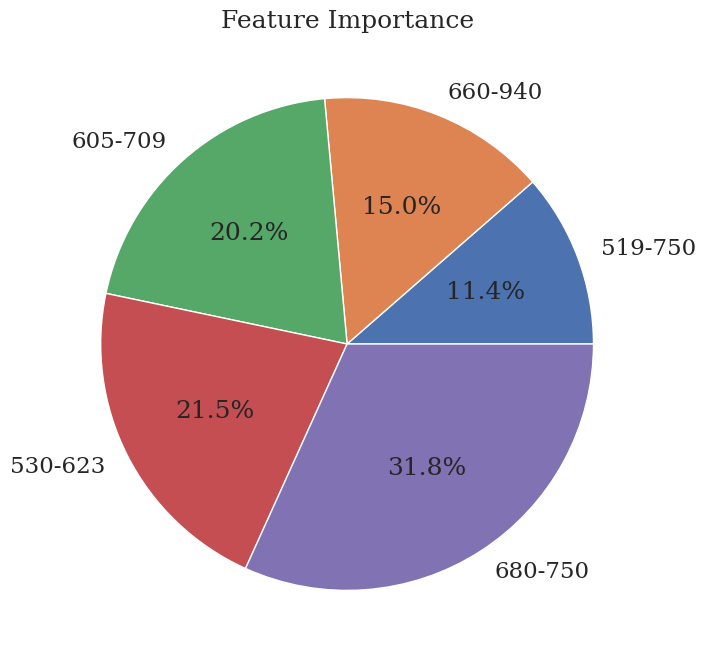

In [ ]:
# Generate feature importance using permutations
result = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean

# Normalize the importance values
importance_normalized = importance / np.sum(importance)

# Sort the features based on importance
sorted_indices = np.argsort(importance_normalized)

# Get the feature names
feature_names = np.array(X_train.columns)  # Replace with your actual feature names

# Plot the feature importance in a pie graph
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized[sorted_indices], labels=feature_names[sorted_indices], autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()

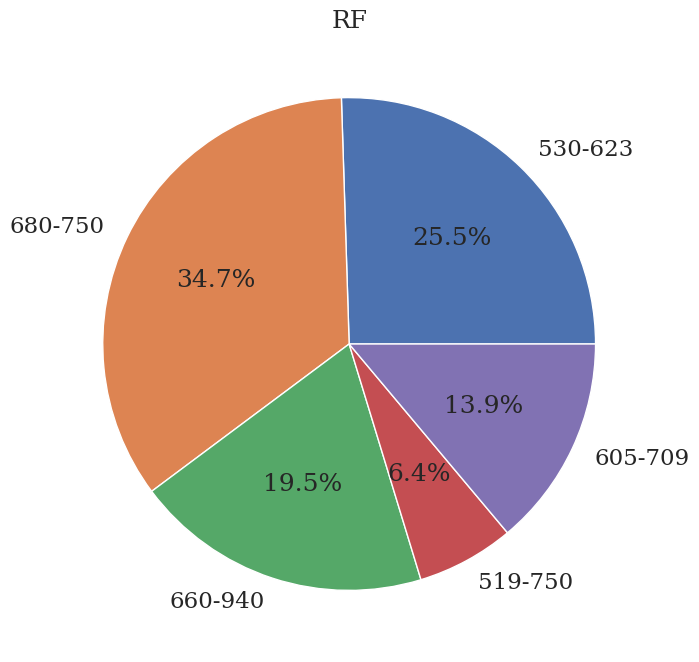

In [ ]:
# Assuming you have trained your Random Forest model and have the predictions
y_test_pred_rf = rf_model.predict(X_test)

# Calculate permutation importance
result_rf = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean

# Normalize the importance values
importance_normalized_rf = importance_rf / np.sum(importance_rf)

# Get the feature names and colors based on the order of X_test columns
feature_names_rf = np.array(X_test.columns)

# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_rf, labels=feature_names_rf, autopct='%1.1f%%')
plt.title('RF')
plt.show()

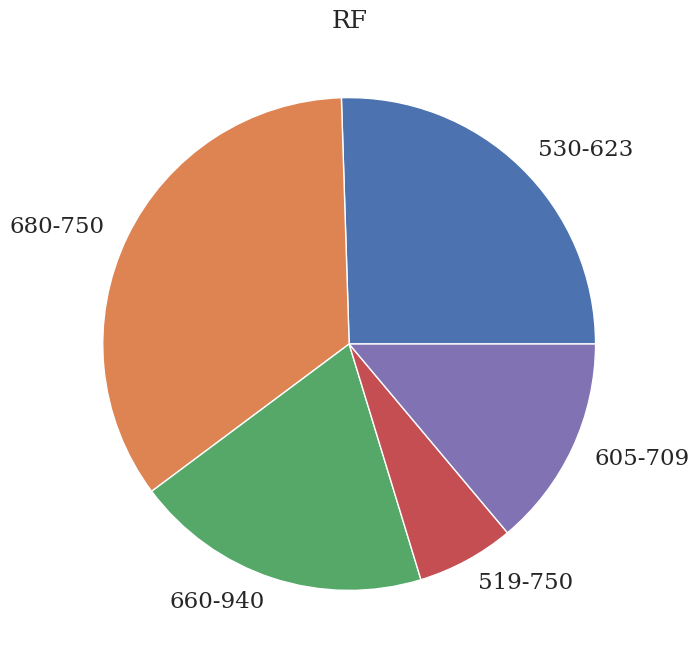

In [ ]:
# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_rf, labels=feature_names_rf, autopct=None)
plt.title('RF')
plt.show()

#### Avg

In [ ]:
# array of avg prediction:
average_pred = np.mean([rf_prediction,xgb_prediction ], axis=0)


# Random check
mean_absolute_error(((xgb_prediction+rf_prediction+svr_prediction)/3),average_pred)

0.06631155983334794

In [ ]:
# Compare to true values

# Calculate mean absolute error
avg_mae = mean_absolute_error(y_test, average_pred)
print('Mean Absolute Error:', avg_mae)

# Calculate mean squared error
avg_mse = mean_squared_error(y_test, average_pred)
print('Mean Squared Error:', avg_mse)

# Calculate root mean squared error
avg_rmse = avg_mse ** 0.5
print('Root Mean Squared Error:', avg_rmse)

# Calculate R-squared score
avg_r2 = r2_score(y_test, average_pred)
print('R-squared:', avg_r2)

# Calculate pvalue
slope, intercept, r_value, pvalue_avg, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_avg)

# Calculate Rrmse score:
avg_Rrmse = 100*avg_rmse/y_test.mean()
print('Rrmse:',avg_Rrmse)
avg_range_rrmse = 100*avg_rmse/(y_test.max()-y_test.min())
print('Range rRMSE:',avg_range_rrmse)

# RPD score
RPD_avg  = y_test.std()/avg_rmse
print('RPD:', RPD_avg)

Mean Absolute Error: 0.5857954362428119
Mean Squared Error: 0.5534419509987061
Root Mean Squared Error: 0.7439367923410605
R-squared: 0.4008247063083261
p-value: 1.6073928945832853e-10
Rrmse: -34.778994518405234
Range rRMSE: 18.20696995450466
RPD: 1.3007010208330811


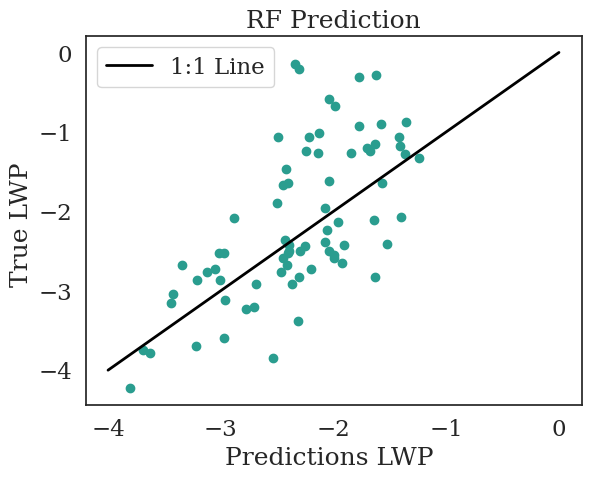

In [ ]:
# Plot the predictions against the true values
plt.scatter(rf_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP ')
plt.ylabel('True LWP ')
plt.title('RF Prediction')
plt.legend()
plt.show()

In [ ]:
models = ['Random_Forest','SVR','XGBoost','Avg']
maes = [mae_rf,mae_svr,mae_xgb,avg_mae]
mses = [mse_rf,mse_svr,mse_xgb,avg_mse]
rmses = [rmse_rf,rmse_svr,rmse_xgb,avg_rmse]
r2s = [r2_rf,r2_svr,r2_xgb,avg_r2]
pvals = [pvalue_rf,pvalue_svr,pvalue_xgb,pvalue_avg]
rpds = [RPD_rf,RPD_svr,RPD_xgb,RPD_avg]
errors = [error_rf,error_svr,error_xgb,avg_Rrmse]
range_errors = [range_error_svr,range_error_rf,range_error_xgb,avg_range_rrmse]

df_bands_results = pd.DataFrame({'MAE': maes, 'MSE': mses, 'RMSE': rmses, 'R$^2$':r2s, 'p-val': pvals, 'RPD':rpds, 'Error':errors, 'Range Error':range_errors}, index=models)
df_bands_results

,MAE,MSE,RMSE,R$^2$,p-val,RPD,Error,Range Error
Random_Forest,0.585831,0.551830,0.742852,0.402570,1.607393e-10,1.302600,-34.728295,18.937131
SVR,0.575734,0.598722,0.773771,0.351803,2.740301e-09,1.250550,-36.173750,18.180429
XGBoost,0.590555,0.569737,0.754809,0.383183,5.661992e-10,1.281966,-35.287273,18.473056
Avg,0.585795,0.553442,0.743937,0.400825,1.607393e-10,1.300701,-34.778995,18.206970


In [ ]:
df_bands_results[['p-val']]

,p-val
Random_Forest,1.607393e-10
SVR,2.740301e-09
XGBoost,5.661992e-10
Avg,1.607393e-10


#### ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.utils.fixes import loguniform

# create a parameter grid: map the parameter names to the values that should be searche
param_dist = {
    "hidden_layer_sizes": [(100,), (200,), (300,), (400,), (500,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": loguniform(1e-6, 1.0),
    "batch_size": [16, 32, 64, 128],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": loguniform(1e-4, 1e-2),
    "power_t": loguniform(0.1, 1.0),
    "max_iter": [200, 400, 600, 800, 1000],
    "shuffle": [True, False],
    "tol": loguniform(1e-5, 1e-2),
    "warm_start": [True, False],
    "momentum": np.linspace(0.1, 0.9, 20),
    "nesterovs_momentum": [True, False],
    "early_stopping": [True, False],
    "validation_fraction": loguniform(0.1, 0.3),
    "beta_1": np.linspace(0.1, 0.9, 20),
    "beta_2": np.linspace(0.1, 0.9, 20),
    "epsilon": loguniform(1e-8, 1e-4),
    "n_iter_no_change": [10, 20, 30],
    "max_fun": [15000],
}

mlp_regressor = MLPRegressor()
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(mlp_regressor, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, error_score='raise')
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'identity', 'alpha': 6.690421166498802e-05, 'batch_size': 32, 'beta_1': 0.5631578947368421, 'beta_2': 0.7736842105263158, 'early_stopping': True, 'epsilon': 2.8016351587162577e-06, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.000816845589476017, 'max_fun': 15000, 'max_iter': 600, 'momentum': 0.5631578947368421, 'n_iter_no_change': 30, 'nesterovs_momentum': False, 'power_t': 0.3912141628549695, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0006647135865318024, 'validation_fraction': 0.12060371447596409, 'warm_start': True}
Best Score: 0.35120459421317624


In [ ]:
# Create the SVR model
ann = MLPRegressor(**random_search.best_params_)


# Fit the model to the training data
ann.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(ann, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.4612212354997464
MAE: 0.538760870043896
RMSE: 0.6791327083124081
R2: 0.3625561990070396


In [ ]:
y_test_pred = ann.predict(X_test)

# Calculate mean absolute error
mae_ann = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_ann)

# Calculate mean squared error
mse_ann = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_ann)

# Calculate root mean squared error
rmse_ann = mse_ann ** 0.5
print('Root Mean Squared Error:', rmse_ann)

# Calculate R-squared score
r2_ann = r2_score(y_test, y_test_pred)
print('R-squared:', r2_ann)

# Calculate error score
error_ann = 100*rmse_ann/y_test.mean()
print('Error (%):', error_ann)

range_error_ann = 100*rmse_ann/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_ann)

# RPD score
RPD_ann  = y_test.std()/rmse_ann
print('RPD:', RPD_ann)

ann_prediction  = y_test_pred

Mean Absolute Error: 0.6341778203330642
Mean Squared Error: 0.6814307836931576
Root Mean Squared Error: 0.8254882092999013
R-squared: 0.26225959341696203
Error (%): -38.59151772276828
Range Error (%): 20.202844084676975
RPD: 1.1722025031150507


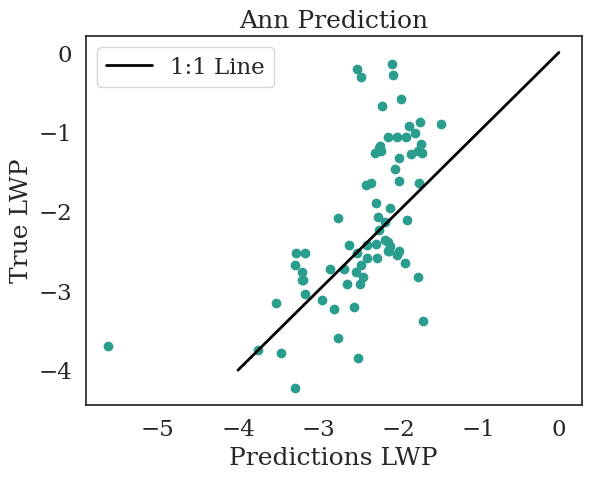

In [ ]:
# Plot the predictions against the true values
plt.scatter(ann_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('Ann Prediction')
plt.legend()
plt.show()

## ML  - NDSI data + Species

In [ ]:
X = df[["530-623","680-750","660-940","519-750","605-709","English_name"]]
y = df['LWP']

# Split to train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# X_train.shape,X_val.shape,X_test.shape
X_train.shape,X_test.shape

((172, 6), (74, 6))

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode "English_name"
X_train["Species"] = label_encoder.fit_transform(X_train["English_name"])
X_test["Species"] = label_encoder.transform(X_test["English_name"])

# Print the mapping of the encoded values
english_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print("Species encoding mapping:")
print(english_name_mapping)

X_train = X_train[["530-623","680-750","660-940","519-750","605-709",'Species',]]
X_test = X_test[["530-623","680-750","660-940","519-750","605-709",'Species']]

Species encoding mapping:
{0: 'carob', 1: 'cypress', 2: 'oak', 3: 'pine', 4: 'pistacia'}


#### SVR

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searche

param_distribs = {
        'kernel': ['rbf','linear'],
        'shrinking': [False,True],
        'C': reciprocal(10, 400),
        'epsilon': reciprocal(0.1, 1.0),
        'coef0': expon(scale=1.0),
        'gamma': expon(scale=1.0),
        'degree': [1,2,3,4,5,6],
        'tol': expon(scale=1e-4)
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

# # print the best parameters and the corresponding score
print("Best parameters: {}".format(rnd_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=39.81399334786675, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=39.81399334786675, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.0s
[CV] END C=39.81399334786675, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147603, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   0.1s
[CV] END C=54.41821296015416, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194621, gamma=3.503557475158312, kernel=linear, shrinking=True, tol=2.38687625248947e-05; total time=   0.0s
[CV] END C=54.41821296015416, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194621, gamma=3.503557475158312, kernel=linear, shrinking=T

In [ ]:
refined_param_distribs = {
    'kernel': [rnd_search.best_params_['kernel']],
    'shrinking': [rnd_search.best_params_['shrinking']],
    'C': uniform(loc=rnd_search.best_params_['C']-10, scale=20),
    'epsilon': uniform(loc=rnd_search.best_params_['epsilon']-0.2, scale=0.4),
    'coef0': uniform(loc=rnd_search.best_params_['coef0']-0.5, scale=1.0),
    'gamma': uniform(loc=rnd_search.best_params_['gamma']-0.5, scale=1.0),
    'degree': [rnd_search.best_params_['degree']],
    'tol': uniform(loc=rnd_search.best_params_['tol']-1e-5, scale=2e-5)
}

refined_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=refined_param_distribs,
                                        n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                        verbose=2, random_state=42)
refined_rnd_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters after refinement: {}".format(refined_rnd_search.best_params_))
print("Best cross-validation score after refinement: {:.2f}".format(refined_rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=17.97450562917899, coef0=0.9806444398092923, degree=3, epsilon=0.5267377933957611, gamma=1.3936190471137209, kernel=rbf, shrinking=True, tol=6.574948473188436e-05; total time=   0.0s
[CV] END C=17.97450562917899, coef0=0.9806444398092923, degree=3, epsilon=0.5267377933957611, gamma=1.3936190471137209, kernel=rbf, shrinking=True, tol=6.574948473188436e-05; total time=   0.0s
[CV] END C=17.97450562917899, coef0=0.9806444398092923, degree=3, epsilon=0.5267377933957611, gamma=1.3936190471137209, kernel=rbf, shrinking=True, tol=6.574948473188436e-05; total time=   0.0s
[CV] END C=13.603593658955791, coef0=0.08801374556757557, degree=3, epsilon=0.5804106749811733, gamma=1.3960755746598932, kernel=rbf, shrinking=True, tol=7.679056347895654e-05; total time=   0.0s
[CV] END C=13.603593658955791, coef0=0.08801374556757557, degree=3, epsilon=0.5804106749811733, gamma=1.3960755746598932, kernel=rbf, shrinking=True, tol=7.6790

In [ ]:
# Create the SVR model
svr = SVR (**refined_rnd_search.best_params_)


# Fit the model to the training data
svr.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(svr, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.4041425067507317
MAE: 0.47777017062989147
RMSE: 0.6357220357599158
R2: 0.4468435142711199


In [ ]:
y_test_pred = svr.predict(X_test)

# Calculate mean absolute error
mae_svr = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_svr)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_svr)

# Calculate root mean squared error
rmse_svr = mse_svr ** 0.5
print('Root Mean Squared Error:', rmse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_test_pred)
print('R-squared:', r2_svr)

# Add pval
slope, intercept, r_value, pvalue_svr, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_svr)

# Calculate error score
error_svr = 100*rmse_svr/y_test.mean()
print('Error (%):', error_svr)

range_error_svr = 100*rmse_svr/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_svr)

# RPD score
RPD_svr  = y_test.std()/rmse_svr
print('RPD:', RPD_svr)

svr_prediction  = y_test_pred

Mean Absolute Error: 0.5031158266628324
Mean Squared Error: 0.44536410102980334
Root Mean Squared Error: 0.6673560526658939
R-squared: 0.5279677009290775
p-value: 1.1839746245851092e-13
Error (%): -27.984715670897522
Range Error (%): 15.25036683422975
RPD: 1.465441787994338


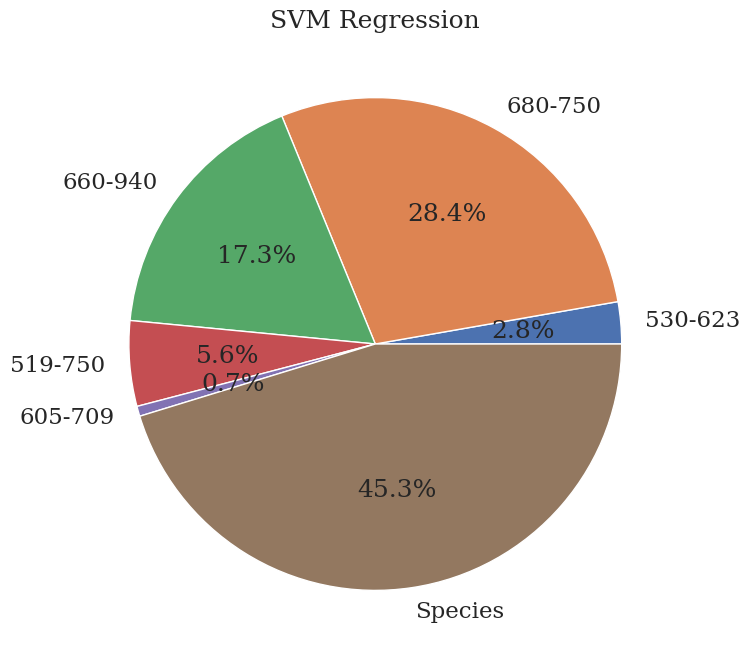

In [ ]:
result_svr = permutation_importance(svr, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
importance_svr = result_svr.importances_mean

# Normalize the importance values
importance_normalized_svr = importance_svr / np.sum(importance_svr)

# Get the feature names and colors based on the order of X_test columns
feature_names_svr = np.array(X_test.columns)

# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_svr, labels=feature_names_svr, autopct='%1.1f%%')
plt.title('SVM Regression')
plt.show()

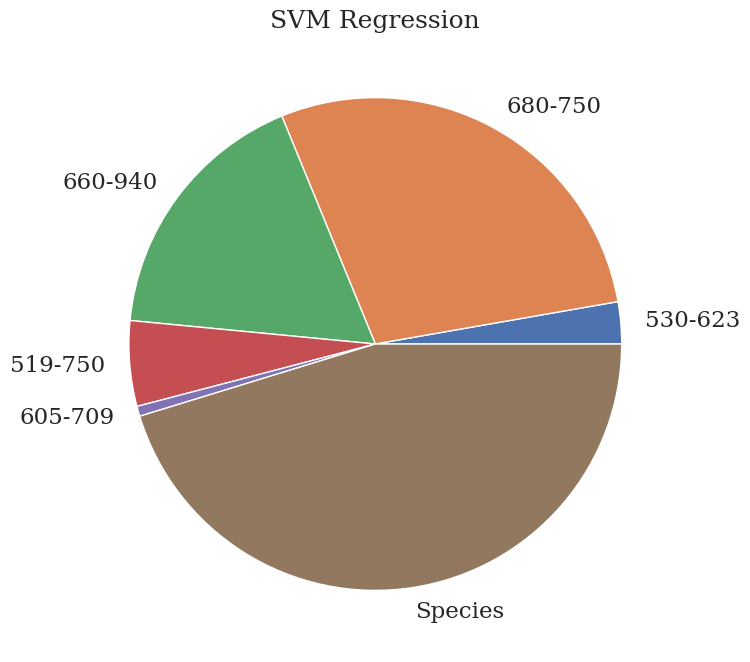

In [ ]:
# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_svr, labels=feature_names_svr, autopct=None)
plt.title('SVM Regression')
plt.show()

#### XGB

In [ ]:
# Define the parameter grid for the search
param_grid = {    'max_depth': [4, 5, 6,7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [i for i in range(100, 1400, 150)],
    'subsample': [i/10 for i in range(1, 10)],
    'colsample_bytree': [i/10 for i in range(1, 10)],
    'reg_alpha': [i/10 for i in range(1, 10)],
    'reg_lambda': [i/10 for i in range(1, 10)],
    'min_child_weight':[i for i in range(2,8)]
              }

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# # Perform the randomized search with cross-validation
search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, random_state=42)
search.fit(X_train, y_train)

# # Print the best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best parameters:  {'subsample': 0.2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'n_estimators': 1150, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Best score:  0.3266473339599875


In [ ]:
refined_param_grid = {
    'max_depth': [search.best_params_['max_depth']-1, search.best_params_['max_depth'], search.best_params_['max_depth']+1],
    'learning_rate': [search.best_params_['learning_rate']*0.9, search.best_params_['learning_rate'], search.best_params_['learning_rate']*1.1],
    'n_estimators': [search.best_params_['n_estimators']-100, search.best_params_['n_estimators'], search.best_params_['n_estimators']+100],
    'subsample': [search.best_params_['subsample']*0.9, search.best_params_['subsample'], search.best_params_['subsample']*1.1],
    'colsample_bytree': [search.best_params_['colsample_bytree']*0.9, search.best_params_['colsample_bytree'], search.best_params_['colsample_bytree']*1.1],
    'reg_alpha': [search.best_params_['reg_alpha']*0.9, search.best_params_['reg_alpha'], search.best_params_['reg_alpha']*1.1],
    'reg_lambda': [search.best_params_['reg_lambda']*0.9, search.best_params_['reg_lambda'], search.best_params_['reg_lambda']*1.1],
    'min_child_weight': [search.best_params_['min_child_weight']-1, search.best_params_['min_child_weight'], search.best_params_['min_child_weight']+1]
}

refined_search = RandomizedSearchCV(xgb_model, refined_param_grid, cv=3, n_iter=10, random_state=42)
refined_search.fit(X_train, y_train)

# Print the best parameters and score after refinement
print("Best parameters after refinement: ", refined_search.best_params_)
print("Best score after refinement: ", refined_search.best_score_)


Best parameters after refinement:  {'subsample': 0.18000000000000002, 'reg_lambda': 0.8800000000000001, 'reg_alpha': 0.8, 'n_estimators': 1150, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9900000000000001}
Best score after refinement:  0.3457169187728426


In [ ]:
xgb_model = XGBRegressor(**refined_search.best_params_)

xgb_model.fit(X_train, y_train)
# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(xgb_model, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.47186687101439656
MAE: 0.5153926741910535
RMSE: 0.6869256662946848
R2: 0.3541480647488615


In [ ]:
y_test_pred = xgb_model.predict(X_test)

# Calculate mean absolute error
mae_xgb = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_xgb)

# Calculate mean squared error
mse_xgb = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_xgb)

# Calculate root mean squared error
rmse_xgb = mse_xgb ** 0.5
print('Root Mean Squared Error:', rmse_xgb)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_test_pred)
print('R-squared:', r2_xgb)

# Add pval
slope, intercept, r_value, pvalue_xgb, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_xgb)

error_xgb = 100*rmse_xgb/y_test.mean()
print('Error (%):', error_xgb)

range_error_xgb = 100*rmse_xgb/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_xgb)

# RPD score
RPD_xgb  = y_test.std()/rmse_xgb
print('RPD:', RPD_xgb)

# for storing all predictions
xgb_prediction = y_test_pred

Mean Absolute Error: 0.5414509710492315
Mean Squared Error: 0.4737256715090389
Root Mean Squared Error: 0.688277321658239
R-squared: 0.497907852621547
p-value: 1.072365325043008e-12
Error (%): -28.86202211306784
Range Error (%): 15.728457990361951
RPD: 1.420897385796998


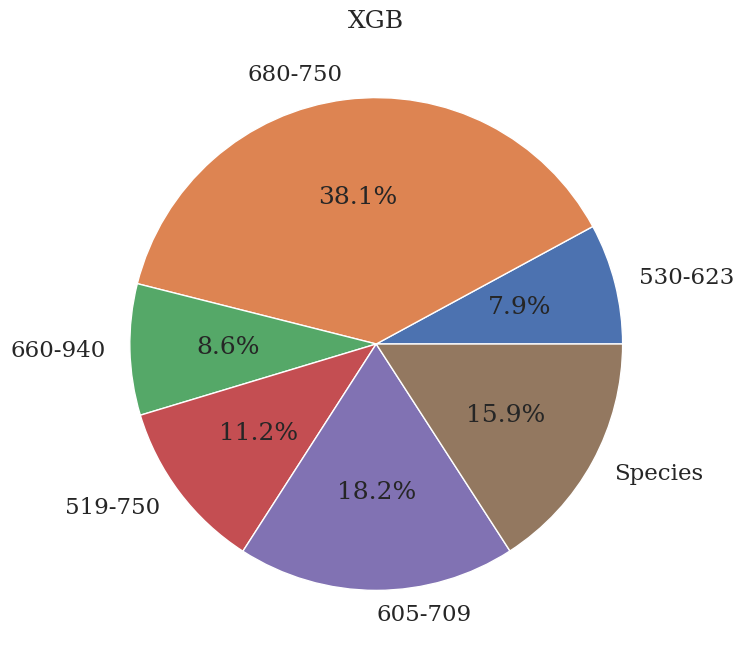

In [ ]:
# Calculate permutation importance
result_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
importance_xgb = result_xgb.importances_mean

# Normalize the importance values
importance_normalized_xgb = importance_xgb / np.sum(importance_xgb)

# Get the feature names and colors based on the order of X_test columns
feature_names_xgb = np.array(X_test.columns)

# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_xgb, labels=feature_names_xgb, autopct='%1.1f%%')
plt.title('XGB')
plt.show()

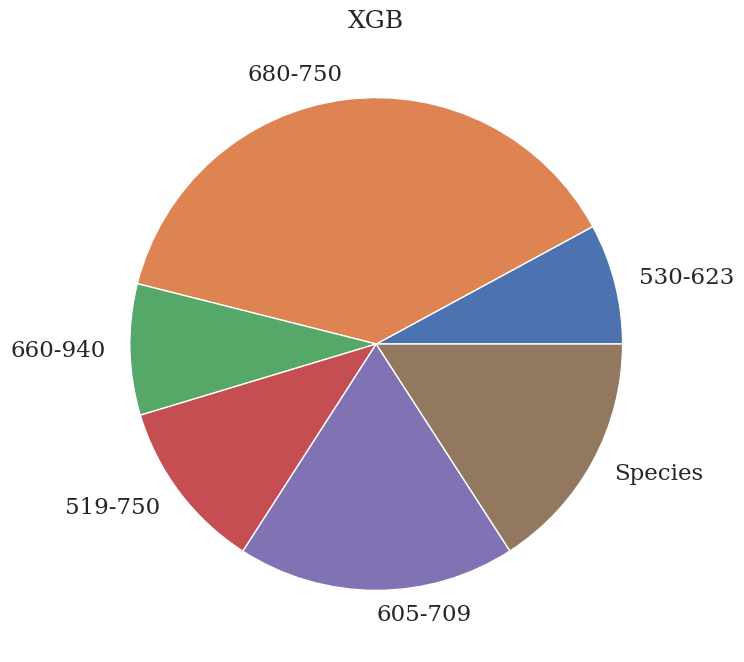

In [ ]:
# Plot the feature importance in a pie graph with different colors for each feature
plt.figure(figsize=(8, 8))
plt.pie(importance_normalized_xgb, labels=feature_names_xgb, autopct=None)
plt.title('XGB')
plt.show()

#### RF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
fit_model = rf_random.fit(X_train,y_train)

# # print the selection of best estimator
print(fit_model.best_estimator_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
rf_model = RandomForestRegressor(max_depth=110, max_features='sqrt', n_estimators=1000).fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_rf)

# Calculate root mean squared error
rmse_rf = mse_rf ** 0.5
print('Root Mean Squared Error:', rmse_rf)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_test_pred)
print('R-squared:', r2_rf)

# Add pval
slope, intercept, r_value, pvalue_rf, std_err = linregress(y_test, y_test_pred)
print( 'p-value:', pvalue_rf)

# Calculate error score
error_rf = 100*rmse_rf/y_test.mean()
print('Error (%):', error_rf)

range_error_rf = 100*rmse_rf/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_rf)

# RPD score
RPD_rf  = y_test.std()/rmse_rf
print('RPD:', RPD_rf)

rf_prediction  = y_test_pred

Mean Absolute Error: 0.5832643918918904
Mean Squared Error: 0.5470557166003353
Root Mean Squared Error: 0.7396321495178094
R-squared: 0.42018683807326684
p-value: 3.511952373635252e-10
Error (%): -31.01552060946563
Range Error (%): 16.902014385690343
RPD: 1.3222403159261304


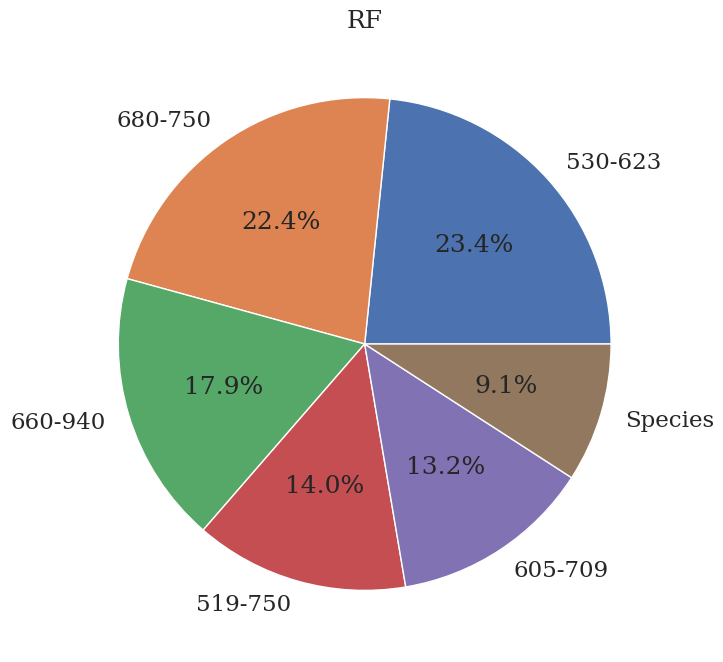

In [ ]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances and feature names in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a pie chart for sorted feature importances
plt.figure(figsize=(8, 8))
plt.pie(sorted_feature_importances, labels=sorted_feature_names, autopct='%1.1f%%',)
plt.title('RF')
plt.show()

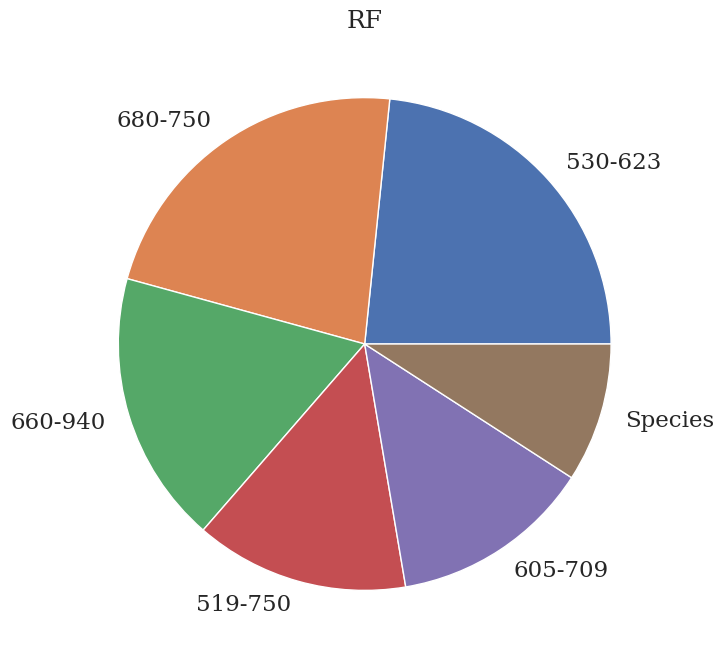

In [ ]:
# Create a pie chart for sorted feature importances
plt.figure(figsize=(8, 8))
plt.pie(sorted_feature_importances, labels=sorted_feature_names, autopct=None)
plt.title('RF')
plt.show()

#### Avg

In [ ]:
# array of avg prediction:
average_pred = np.mean([svr_prediction,xgb_prediction ], axis=0)

# Calculate mean absolute error
avg_mae = mean_absolute_error(y_test, average_pred)
print('Mean Absolute Error:', avg_mae)

# Calculate mean squared error
avg_mse = mean_squared_error(y_test, average_pred)
print('Mean Squared Error:', avg_mse)

# Calculate root mean squared error
avg_rmse = avg_mse ** 0.5
print('Root Mean Squared Error:', avg_rmse)

# Calculate R-squared score
avg_r2 = r2_score(y_test, average_pred)
print('R-squared:', avg_r2)

# Add pval
slope, intercept, r_value, pvalue_avg, std_err = linregress(y_test, average_pred)
print( 'p-value:', pvalue_avg)

# Calculate Rrmse score:
avg_Rrmse = 100*avg_rmse/y_test.mean()
print('Rrmse:',avg_Rrmse)
avg_range_rrmse = 100*avg_rmse/(y_test.max()-y_test.min())
print('Range rRMSE:',avg_range_rrmse)

# RPD score
RPD_avg  = y_test.std()/avg_rmse
print('RPD:', RPD_avg)

Mean Absolute Error: 0.5048713295185161
Mean Squared Error: 0.4344120954639181
Root Mean Squared Error: 0.6590994579453985
R-squared: 0.5395755075635785
p-value: 2.9720446516356826e-14
Rrmse: -27.638486016217858
Range rRMSE: 15.061687795827204
RPD: 1.4837995013623102


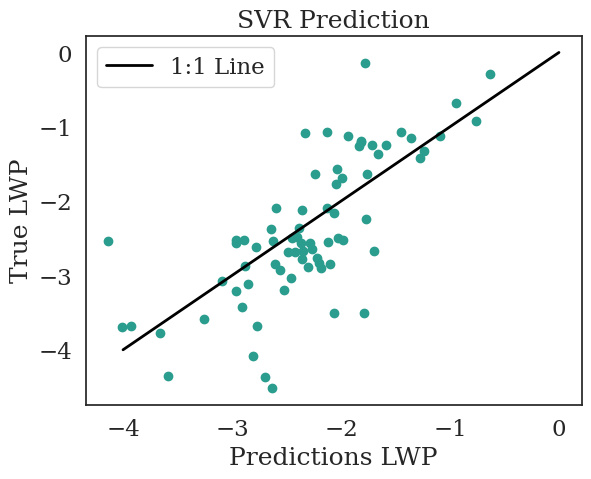

In [ ]:
# Plot the predictions against the true values
plt.scatter(svr_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('SVR Prediction')
plt.legend()
plt.show()

In [ ]:
models = ['Random_Forest','SVR','XGBoost','Avg']
maes = [mae_rf,mae_svr,mae_xgb,avg_mae]
mses = [mse_rf,mse_svr,mse_xgb,avg_mse]
rmses = [rmse_rf,rmse_svr,rmse_xgb,avg_rmse]
r2s = [r2_rf,r2_svr,r2_xgb,avg_r2]
pvals = [pvalue_rf,pvalue_svr,pvalue_xgb,pvalue_avg]
rpds = [RPD_rf,RPD_svr,RPD_xgb,RPD_avg]
errors = [error_rf,error_svr,error_xgb,avg_Rrmse]
range_errors = [range_error_svr,range_error_rf,range_error_xgb,avg_range_rrmse]

df_bands_results = pd.DataFrame({'MAE': maes, 'MSE': mses, 'RMSE': rmses, 'R$^2$':r2s, 'p-value':pvals, 'RPD':rpds, 'Error':errors, 'Range Error':range_errors}, index=models)
df_bands_results

,MAE,MSE,RMSE,R$^2$,p-value,RPD,Error,Range Error
Random_Forest,0.583264,0.547056,0.739632,0.420187,3.511952e-10,1.322240,-31.015521,15.250367
SVR,0.503116,0.445364,0.667356,0.527968,1.183975e-13,1.465442,-27.984716,16.902014
XGBoost,0.541451,0.473726,0.688277,0.497908,1.072365e-12,1.420897,-28.862022,15.728458
Avg,0.504871,0.434412,0.659099,0.539576,2.972045e-14,1.483800,-27.638486,15.061688


In [ ]:
df_bands_results[['p-value']]

,p-value
Random_Forest,3.511952e-10
SVR,1.183975e-13
XGBoost,1.072365e-12
Avg,2.972045e-14


In [ ]:
# Load the data
data = X_test  # Replace X_test with your actual test data

# Create a list of the unique English_name_encoded and treatment_encoded values
english_name_encoded = data['Species'].unique()

# Create a dictionary to store the results
results_english_name = {}

# Loop over each of the English_name_encoded values
for english_name_encoded in english_name_encoded:
    # Create a subset of the data for the current English_name_encoded value
    data_subset = data[data['Species'] == english_name_encoded]

    # Get the predictions for the current English_name_encoded value
    predictions = svr.predict(data_subset)

    # Calculate the mean squared error for the current English_name_encoded value
    rmse = np.sqrt(np.mean((predictions - y_test[data_subset.index]) ** 2))

    # Calculate the R2 score for the current English_name_encoded value
    true_values = y_test[data_subset.index]
    r2 = r2_score(true_values, predictions)

    # Store the results for the current English_name_encoded value in the dictionary
    results_english_name[english_name_mapping[english_name_encoded]] = {'rmse': rmse, 'r2': r2}

# Extract the names, RMSE, and R2 values for plotting
names_english_name = list(results_english_name.keys())
rmse_values_english_name = [result['rmse'] for result in results_english_name.values()]
r2_values_english_name = [result['r2'] for result in results_english_name.values()]
# replace negative with 0
# r2_values_english_name = [0 if x < 0 else x for x in r2_values_english_name]

<ipython-input-28-90e3700e70c7>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([species.capitalize() for species in species_order])
<ipython-input-28-90e3700e70c7>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([species.capitalize() for species in species_order])


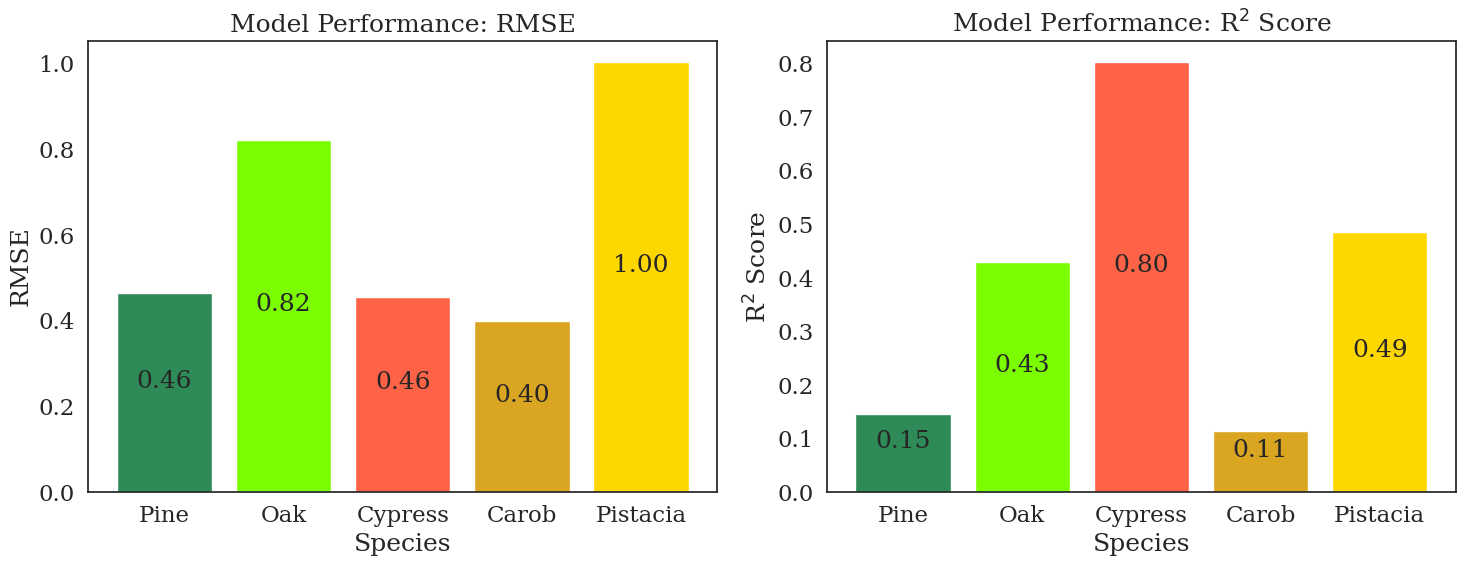

In [ ]:
# Specify the order and colors for each species
species_order = ['pine', 'oak', 'cypress', 'carob', 'pistacia']
species_colors = ['seagreen', 'lawngreen', 'tomato', 'goldenrod', 'gold']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the RMSE values for English_name
mse_plot = axes[0].bar(species_order, [rmse_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
axes[0].set_xlabel('Species')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Model Performance: RMSE')

# Add text values for RMSE - English Name
for rect, rmse_value in zip(mse_plot, [rmse_values_english_name[names_english_name.index(species)] for species in species_order]):
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(species_order, [r2_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
axes[1].set_xlabel('Species')
axes[1].set_ylabel('R$^2$ Score')
axes[1].set_title('Model Performance: R$^2$ Score')

# Add text values for R2 - English Name
for rect, r2_value in zip(r2_plot, [r2_values_english_name[names_english_name.index(species)] for species in species_order]):
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Capitalize the tick labels on the x-axis
for ax in axes:
    ax.set_xticklabels([species.capitalize() for species in species_order])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-33-93c9d8bc391b>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([species.capitalize() for species in species_order])
<ipython-input-33-93c9d8bc391b>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([species.capitalize() for species in species_order])


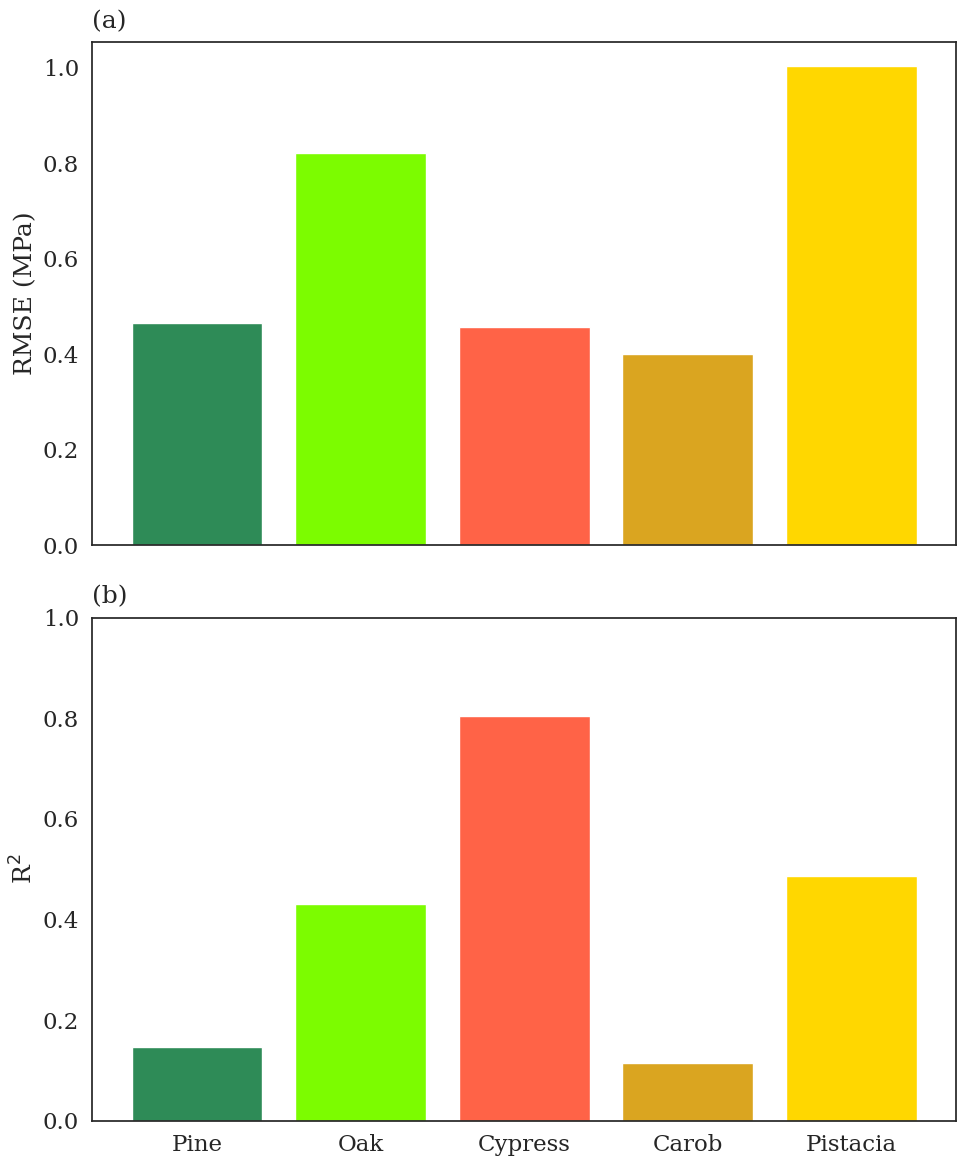

In [ ]:
# Specify the order and colors for each species
species_order = ['pine', 'oak', 'cypress', 'carob', 'pistacia']
species_colors = ['seagreen', 'lawngreen', 'tomato', 'goldenrod', 'gold']

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot the RMSE values for English_name
mse_plot = axes[0].bar(species_order, [rmse_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
# axes[0].set_xlabel('Species')
axes[0].set_ylabel('RMSE (MPa)')
# axes[0].set_ylim(0,1)
# axes[0].set_title('Model Performance: RMSE')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(species_order, [r2_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
# axes[1].set_xlabel('Species')
axes[1].set_ylabel('R$^2$')
axes[1].set_ylim(0,1)
# axes[1].set_title('Model Performance: R$^2$ Score')

# Capitalize the tick labels on the x-axis for both subplots
for ax in axes:
    ax.set_xticklabels([species.capitalize() for species in species_order])

# Add letters of a and b
# axes[0].text(0.05, 0.95, 'a', transform=axes[0].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')
# axes[1].text(0.05, 0.95, 'b', transform=axes[1].transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

axes[0].set_title("(a)", loc='left', pad=10)
axes[1].set_title("(b)", loc='left', pad=10)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a high-resolution image
fig.savefig("rmse_r2.png",
            format="png",
            dpi=600,
            bbox_inches="tight")

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'tanh', 'alpha': 0.06392868454625102, 'batch_size': 128, 'beta_1': 0.8157894736842105, 'beta_2': 0.1842105263157895, 'early_stopping': False, 'epsilon': 3.265888946964011e-08, 'hidden_layer_sizes': (500,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.004378032200510873, 'max_fun': 15000, 'max_iter': 800, 'momentum': 0.1842105263157895, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.4482133335269568, 'shuffle': True, 'solver': 'lbfgs', 'tol': 1.614670469622491e-05, 'validation_fraction': 0.11170775567324355, 'warm_start': False}
Best Score: 0.3605753688985961


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

MSE: 0.4339386079372748
MAE: 0.48877682150183044
RMSE: 0.6587401672414358
R2: 0.40606110127209316
Mean Absolute Error: 0.5156769288644293
Mean Squared Error: 0.4778112719846307
Root Mean Squared Error: 0.6912389398642345
R-squared: 0.49357760826390895
Error (%): -28.986213754230686
Range Error (%): 15.79613665137647
RPD: 1.4148095407351235


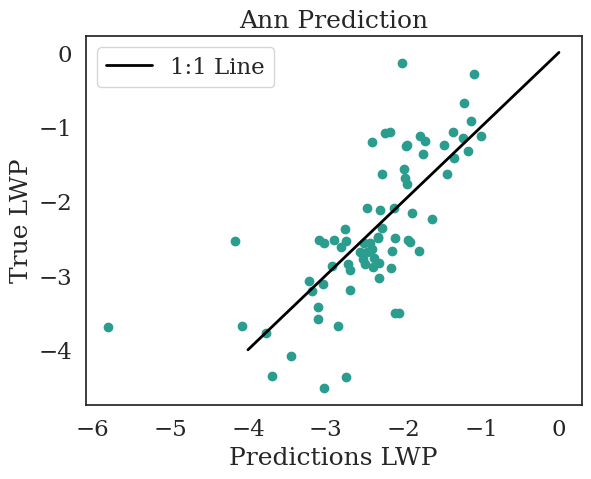

KeyError: 'English_name_encoded'

In [ ]:
#### ANN

from sklearn.neural_network import MLPRegressor
from sklearn.utils.fixes import loguniform

# create a parameter grid: map the parameter names to the values that should be searche
param_dist = {
    "hidden_layer_sizes": [(100,), (200,), (300,), (400,), (500,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": loguniform(1e-6, 1.0),
    "batch_size": [16, 32, 64, 128],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": loguniform(1e-4, 1e-2),
    "power_t": loguniform(0.1, 1.0),
    "max_iter": [200, 400, 600, 800, 1000],
    "shuffle": [True, False],
    "tol": loguniform(1e-5, 1e-2),
    "warm_start": [True, False],
    "momentum": np.linspace(0.1, 0.9, 20),
    "nesterovs_momentum": [True, False],
    "early_stopping": [True, False],
    "validation_fraction": loguniform(0.1, 0.3),
    "beta_1": np.linspace(0.1, 0.9, 20),
    "beta_2": np.linspace(0.1, 0.9, 20),
    "epsilon": loguniform(1e-8, 1e-4),
    "n_iter_no_change": [10, 20, 30],
    "max_fun": [15000],
}

mlp_regressor = MLPRegressor()
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(mlp_regressor, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, error_score='raise')
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Create the SVR model
ann = MLPRegressor(**random_search.best_params_)


# Fit the model to the training data
ann.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(ann, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

y_test_pred = ann.predict(X_test)

# Calculate mean absolute error
mae_ann = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_ann)

# Calculate mean squared error
mse_ann = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_ann)

# Calculate root mean squared error
rmse_ann = mse_ann ** 0.5
print('Root Mean Squared Error:', rmse_ann)

# Calculate R-squared score
r2_ann = r2_score(y_test, y_test_pred)
print('R-squared:', r2_ann)

# Calculate error score
error_ann = 100*rmse_ann/y_test.mean()
print('Error (%):', error_ann)

range_error_ann = 100*rmse_ann/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_ann)

# RPD score
RPD_ann  = y_test.std()/rmse_ann
print('RPD:', RPD_ann)

ann_prediction  = y_test_pred

# Plot the predictions against the true values
plt.scatter(ann_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('Ann Prediction')
plt.legend()
plt.show()

<ipython-input-45-3854d360c312>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([species.capitalize() for species in species_order])


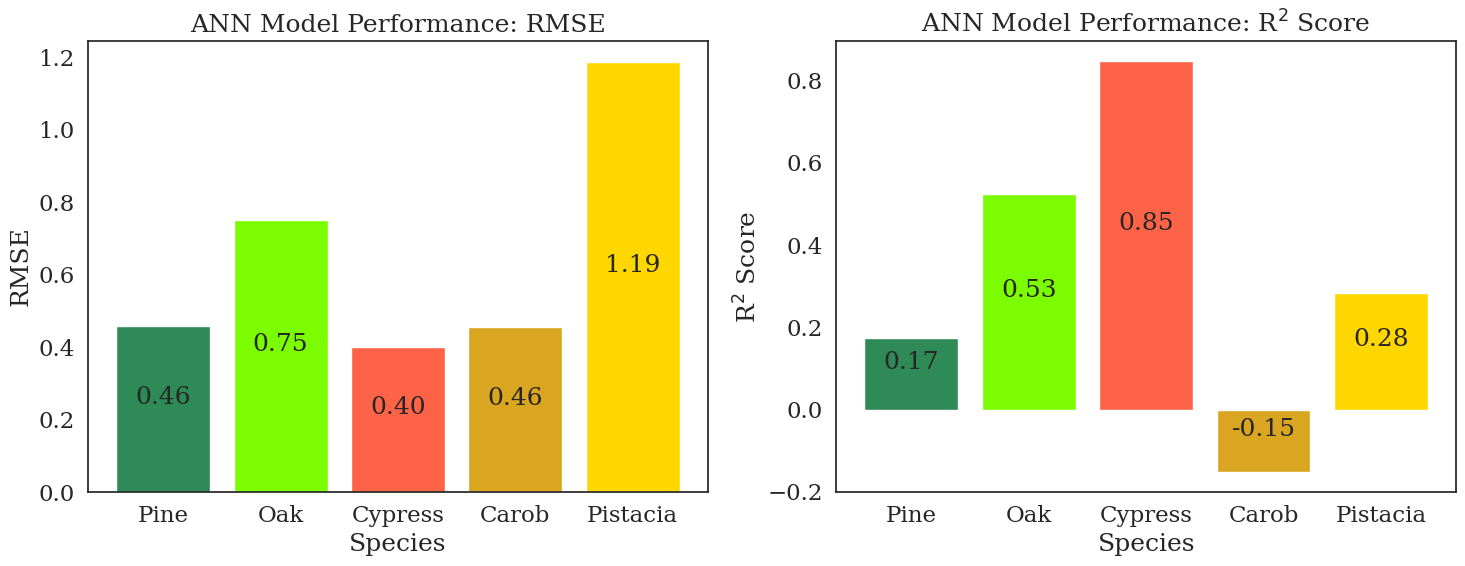

In [ ]:
# Load the data
data = X_test  # Replace X_test with your actual test data

# Create a list of the unique English_name_encoded and treatment_encoded values
english_name_encoded = data['Species'].unique()

# Create a dictionary to store the results
results_english_name = {}

# Loop over each of the English_name_encoded values
for english_name_encoded in english_name_encoded:
    # Create a subset of the data for the current English_name_encoded value
    data_subset = data[data['Species'] == english_name_encoded]

    # Get the predictions for the current English_name_encoded value
    predictions = ann.predict(data_subset)

    # Calculate the mean squared error for the current English_name_encoded value
    rmse = np.sqrt(np.mean((predictions - y_test[data_subset.index]) ** 2))

    # Calculate the R2 score for the current English_name_encoded value
    true_values = y_test[data_subset.index]
    r2 = r2_score(true_values, predictions)

    # Store the results for the current English_name_encoded value in the dictionary
    results_english_name[english_name_mapping[english_name_encoded]] = {'rmse': rmse, 'r2': r2}

# Extract the names, RMSE, and R2 values for plotting
names_english_name = list(results_english_name.keys())
rmse_values_english_name = [result['rmse'] for result in results_english_name.values()]
r2_values_english_name = [result['r2'] for result in results_english_name.values()]
# replace negative with 0
# r2_values_english_name = [0 if x < 0 else x for x in r2_values_english_name]

# Specify the order and colors for each species
species_order = ['pine', 'oak', 'cypress', 'carob', 'pistacia']
species_colors = ['seagreen', 'lawngreen', 'tomato', 'goldenrod', 'gold']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the RMSE values for English_name
mse_plot = axes[0].bar(species_order, [rmse_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
axes[0].set_xlabel('Species')
axes[0].set_ylabel('RMSE')
axes[0].set_title('ANN Model Performance: RMSE')

# Add text values for RMSE - English Name
for rect, rmse_value in zip(mse_plot, [rmse_values_english_name[names_english_name.index(species)] for species in species_order]):
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(species_order, [r2_values_english_name[names_english_name.index(species)] for species in species_order], color=[species_colors[species_order.index(species)] for species in species_order])
axes[1].set_xlabel('Species')
axes[1].set_ylabel('R$^2$ Score')
axes[1].set_title('ANN Model Performance: R$^2$ Score')

# Add text values for R2 - English Name
for rect, r2_value in zip(r2_plot, [r2_values_english_name[names_english_name.index(species)] for species in species_order]):
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Capitalize the tick labels on the x-axis
for ax in axes:
    ax.set_xticklabels([species.capitalize() for species in species_order])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## PCA

In [ ]:
# Apply Standardization (without the first column of the species):
z = df[df.columns[:-10]].apply(lambda x:(x-x.mean())/x.std(), axis=0)
# Apply PCA
pca = PCA().fit(z)
# Transformation
X_trans = pca.transform(z)

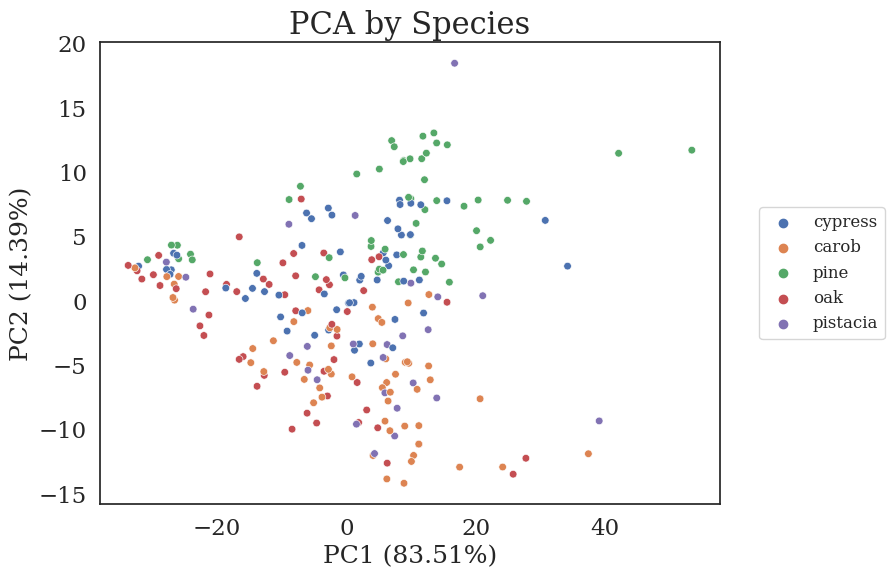

In [ ]:
color_var = 'English_name'
colors = df[color_var] #colors by species

fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],s=30, hue=colors)
ax.set_xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))
ax.set_title("PCA by Species",fontsize=22)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=12)

In [ ]:
X = pd.DataFrame(X_trans)
X = X[X.columns[:5]]
y = df['LWP']


# Split to train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train.shape,X_val.shape,X_test.shape
X_train.shape,X_test.shape

((172, 5), (74, 5))

#### SVR

In [ ]:
# create a parameter grid: map the parameter names to the values that should be searche

param_distribs = {
        'kernel': ['rbf','linear'],
        'shrinking': [False,True],
        'C': reciprocal(10, 400),
        'epsilon': reciprocal(0.1, 1.0),
        'coef0': expon(scale=1.0),
        'gamma': expon(scale=1.0),
        'degree': [1,2,3,4,5,6],
        'tol': expon(scale=1e-4)
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

# # print the best parameters and the corresponding score
print("Best parameters: {}".format(rnd_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=39.81399334786674, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   8.3s
[CV] END C=39.81399334786674, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time=   2.7s
[CV] END C=39.81399334786674, coef0=3.010121430917521, degree=3, epsilon=0.6021310185147604, gamma=0.9084469696321253, kernel=linear, shrinking=False, tol=1.0533264473289401e-05; total time= 2.5min
[CV] END C=54.41821296015416, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194617, gamma=3.503557475158312, kernel=linear, shrinking=True, tol=2.38687625248947e-05; total time=   1.1s
[CV] END C=54.41821296015416, coef0=0.40602818331379076, degree=3, epsilon=0.10485387725194617, gamma=3.503557475158312, kernel=linear, shrinking=T

In [ ]:
refined_param_distribs = {
    'kernel': [rnd_search.best_params_['kernel']],
    'shrinking': [rnd_search.best_params_['shrinking']],
    'C': uniform(loc=rnd_search.best_params_['C']-10, scale=20),
    'epsilon': uniform(loc=rnd_search.best_params_['epsilon']-0.2, scale=0.4),
    'coef0': uniform(loc=rnd_search.best_params_['coef0']-0.5, scale=1.0),
    'gamma': uniform(loc=rnd_search.best_params_['gamma']-0.5, scale=1.0),
    'degree': [rnd_search.best_params_['degree']],
    'tol': uniform(loc=rnd_search.best_params_['tol']-1e-5, scale=2e-5)
}

refined_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=refined_param_distribs,
                                        n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                        verbose=2, random_state=42)
refined_rnd_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters after refinement: {}".format(refined_rnd_search.best_params_))
print("Best cross-validation score after refinement: {:.2f}".format(refined_rnd_search.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END C=71.51083271730566, coef0=0.7883449667244387, degree=2, epsilon=0.8179087851736817, gamma=0.38667576017772903, kernel=linear, shrinking=True, tol=2.925546081588138e-05; total time=   2.8s
[CV] END C=71.51083271730566, coef0=0.7883449667244387, degree=2, epsilon=0.8179087851736817, gamma=0.38667576017772903, kernel=linear, shrinking=True, tol=2.925546081588138e-05; total time=   1.8s
[CV] END C=71.51083271730566, coef0=0.7883449667244387, degree=2, epsilon=0.8179087851736817, gamma=0.38667576017772903, kernel=linear, shrinking=True, tol=2.925546081588138e-05; total time=   3.6s
[CV] END C=67.13992074708247, coef0=-0.10428572751727805, degree=2, epsilon=0.8715816667590937, gamma=0.38913228772390124, kernel=linear, shrinking=True, tol=4.029653956295356e-05; total time=  14.8s
[CV] END C=67.13992074708247, coef0=-0.10428572751727805, degree=2, epsilon=0.8715816667590937, gamma=0.38913228772390124, kernel=linear, shrink

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

Best parameters after refinement: {'C': 68.89982320794009, 'coef0': 0.8106412150669681, 'degree': 2, 'epsilon': 0.6823502983158238, 'gamma': 0.6800638311578058, 'kernel': 'linear', 'shrinking': True, 'tol': 3.875786052697791e-05}
Best cross-validation score after refinement: -0.62


In [ ]:
# Create the SVR model
svr = SVR (**refined_rnd_search.best_params_)


# Fit the model to the training data
svr.fit(X_train, y_train)

# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(svr, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.6219745601713225
MAE: 0.6102435245483665
RMSE: 0.7886536376454004
R2: 0.14038253826942337


In [ ]:
y_test_pred = svr.predict(X_test)

# Calculate mean absolute error
mae_svr = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_svr)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_svr)

# Calculate root mean squared error
rmse_svr = mse_svr ** 0.5
print('Root Mean Squared Error:', rmse_svr)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_test_pred)
print('R-squared:', r2_svr)

# Calculate error score
error_svr = 100*rmse_svr/y_test.mean()
print('Error (%):', error_svr)

range_error_svr = 100*rmse_svr/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_svr)

# RPD score
RPD_svr  = y_test.std()/rmse_svr
print('RPD:', RPD_svr)

svr_prediction  = y_test_pred

Mean Absolute Error: 0.6625505495238745
Mean Squared Error: 0.6695967513986097
Root Mean Squared Error: 0.8182889168249865
R-squared: 0.27507152385130496
Error (%): -38.25495128849698
Range Error (%): 20.026649946769126
RPD: 1.1825155215199639


#### XGB

In [ ]:
# Define the parameter grid for the search
param_grid = {    'max_depth': [4, 5, 6,7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [i for i in range(100, 1400, 150)],
    'subsample': [i/10 for i in range(1, 10)],
    'colsample_bytree': [i/10 for i in range(1, 10)],
    'reg_alpha': [i/10 for i in range(1, 10)],
    'reg_lambda': [i/10 for i in range(1, 10)],
    'min_child_weight':[i for i in range(2,8)]
              }

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# # Perform the randomized search with cross-validation
search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, random_state=42)
search.fit(X_train, y_train)

# # Print the best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best parameters:  {'subsample': 0.2, 'reg_lambda': 0.8, 'reg_alpha': 0.8, 'n_estimators': 1150, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Best score:  0.16457573380596935


In [ ]:
refined_param_grid = {
    'max_depth': [search.best_params_['max_depth']-1, search.best_params_['max_depth'], search.best_params_['max_depth']+1],
    'learning_rate': [search.best_params_['learning_rate']*0.9, search.best_params_['learning_rate'], search.best_params_['learning_rate']*1.1],
    'n_estimators': [search.best_params_['n_estimators']-100, search.best_params_['n_estimators'], search.best_params_['n_estimators']+100],
    'subsample': [search.best_params_['subsample']*0.9, search.best_params_['subsample'], search.best_params_['subsample']*1.1],
    'colsample_bytree': [search.best_params_['colsample_bytree']*0.9, search.best_params_['colsample_bytree'], search.best_params_['colsample_bytree']*1.1],
    'reg_alpha': [search.best_params_['reg_alpha']*0.9, search.best_params_['reg_alpha'], search.best_params_['reg_alpha']*1.1],
    'reg_lambda': [search.best_params_['reg_lambda']*0.9, search.best_params_['reg_lambda'], search.best_params_['reg_lambda']*1.1],
    'min_child_weight': [search.best_params_['min_child_weight']-1, search.best_params_['min_child_weight'], search.best_params_['min_child_weight']+1]
}

refined_search = RandomizedSearchCV(xgb_model, refined_param_grid, cv=3, n_iter=10, random_state=42)
refined_search.fit(X_train, y_train)

# Print the best parameters and score after refinement
print("Best parameters after refinement: ", refined_search.best_params_)
print("Best score after refinement: ", refined_search.best_score_)


Best parameters after refinement:  {'subsample': 0.2, 'reg_lambda': 0.8800000000000001, 'reg_alpha': 0.7200000000000001, 'n_estimators': 1050, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9900000000000001}
Best score after refinement:  0.16512815955999813


In [ ]:
xgb_model = XGBRegressor(**refined_search.best_params_)

xgb_model.fit(X_train, y_train)
# Use cross-validation to predict the target variable for the training set
y_train_pred = cross_val_predict(xgb_model, X_train, y_train, cv=3)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Calculate R2
r2 = r2_score(y_train, y_train_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 0.6040721804208792
MAE: 0.6074797619719838
RMSE: 0.7772208054477693
R2: 0.1651250265084503


In [ ]:
y_test_pred = xgb_model.predict(X_test)

# Calculate mean absolute error
mae_xgb = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_xgb)

# Calculate mean squared error
mse_xgb = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_xgb)

# Calculate root mean squared error
rmse_xgb = mse_xgb ** 0.5
print('Root Mean Squared Error:', rmse_xgb)

# Calculate R-squared score
r2_xgb = r2_score(y_test, y_test_pred)
print('R-squared:', r2_xgb)

error_xgb = 100*rmse_xgb/y_test.mean()
print('Error (%):', error_xgb)

range_error_xgb = 100*rmse_xgb/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_xgb)

# RPD score
RPD_xgb  = y_test.std()/rmse_xgb
print('RPD:', RPD_xgb)

# for storing all predictions
xgb_prediction = y_test_pred

Mean Absolute Error: 0.5779209652849144
Mean Squared Error: 0.5518345788234962
Root Mean Squared Error: 0.7428556917891228
R-squared: 0.40256490271630585
Error (%): -34.72845314102375
Range Error (%): 18.180511301740644
RPD: 1.302593970711599


#### RF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
fit_model = rf_random.fit(X_train,y_train)

# # print the selection of best estimator
print(fit_model.best_estimator_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits
RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=600)


In [ ]:
rf_model = RandomForestRegressor(max_depth=110, max_features='sqrt', n_estimators=1000).fit(X_train,y_train)
y_test_pred = rf_model.predict(X_test)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', mae_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', mse_rf)

# Calculate root mean squared error
rmse_rf = mse_rf ** 0.5
print('Root Mean Squared Error:', rmse_rf)

# Calculate R-squared score
r2_rf = r2_score(y_test, y_test_pred)
print('R-squared:', r2_rf)

# Calculate error score
error_rf = 100*rmse_rf/y_test.mean()
print('Error (%):', error_rf)

range_error_rf = 100*rmse_rf/(y_test.max()-y_test.min())
print('Range Error (%):', range_error_rf)

# RPD score
RPD_rf  = y_test.std()/rmse_rf
print('RPD:', RPD_rf)

rf_prediction  = y_test_pred

Mean Absolute Error: 0.6212272972972972
Mean Squared Error: 0.655937748191704
Root Mean Squared Error: 0.8098998383699703
R-squared: 0.2898592305715214
Error (%): -37.86276244045877
Range Error (%): 19.821337209250373
RPD: 1.1947642157588356


#### Avg

In [ ]:
# array of avg prediction:
average_pred = np.mean([svr_prediction,xgb_prediction ], axis=0)

# Calculate mean absolute error
avg_mae = mean_absolute_error(y_test, average_pred)
print('Mean Absolute Error:', avg_mae)

# Calculate mean squared error
avg_mse = mean_squared_error(y_test, average_pred)
print('Mean Squared Error:', avg_mse)

# Calculate root mean squared error
avg_rmse = avg_mse ** 0.5
print('Root Mean Squared Error:', avg_rmse)

# Calculate R-squared score
avg_r2 = r2_score(y_test, average_pred)
print('R-squared:', avg_r2)

# Calculate Rrmse score:
avg_Rrmse = 100*avg_rmse/y_test.mean()
print('Rrmse:',avg_Rrmse)
avg_range_rrmse = 100*avg_rmse/(y_test.max()-y_test.min())
print('Range rRMSE:',avg_range_rrmse)

# RPD score
RPD_avg  = y_test.std()/avg_rmse
print('RPD:', RPD_avg)

Mean Absolute Error: 0.6050201642683507
Mean Squared Error: 0.5659530001739534
Root Mean Squared Error: 0.7522984781148726
R-squared: 0.3872798141106124
Rrmse: -35.1699027604575
Range rRMSE: 18.411612288665506
RPD: 1.2862439223033375


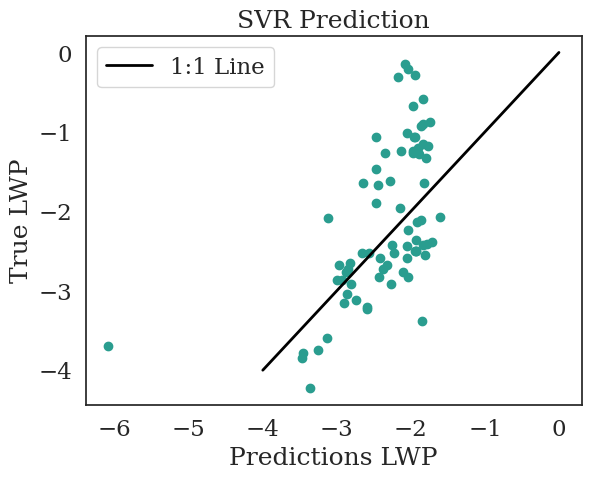

In [ ]:
# Plot the predictions against the true values
plt.scatter(svr_prediction,y_test,color= '#2a9d8f')
# plt.scatter(rf_prediction,y_test,color= 'yellow',label='RF')
plt.plot([-4,0],[-4,0],lw=2,color ='black',label='1:1 Line')
plt.xlabel('Predictions LWP')
plt.ylabel('True LWP')
plt.title('SVR Prediction')
plt.legend()
plt.show()

In [ ]:
models = ['Random_Forest','SVR','XGBoost','Avg']
maes = [mae_rf,mae_svr,mae_xgb,avg_mae]
mses = [mse_rf,mse_svr,mse_xgb,avg_mse]
rmses = [rmse_rf,rmse_svr,rmse_xgb,avg_rmse]
r2s = [r2_rf,r2_svr,r2_xgb,avg_r2]
rpds = [RPD_rf,RPD_svr,RPD_xgb,RPD_avg]
errors = [error_rf,error_svr,error_xgb,avg_Rrmse]
range_errors = [range_error_svr,range_error_rf,range_error_xgb,avg_range_rrmse]

df_bands_results = pd.DataFrame({'MAE': maes, 'MSE': mses, 'RMSE': rmses, 'R$^2$':r2s,'RPD':rpds, 'Error (%)':errors,'Range Error (%)':range_errors}, index=models)
df_bands_results

,MAE,MSE,RMSE,R$^2$,RPD,Error (%),Range Error (%)
Random_Forest,0.621227,0.655938,0.809900,0.289859,1.194764,-37.862762,20.026650
SVR,0.662551,0.669597,0.818289,0.275072,1.182516,-38.254951,19.821337
XGBoost,0.577921,0.551835,0.742856,0.402565,1.302594,-34.728453,18.180511
Avg,0.605020,0.565953,0.752298,0.387280,1.286244,-35.169903,18.411612


In [ ]:
# Load the data
data = X_test  # Replace X_test with your actual test data

# Create a list of the unique English_name_encoded and treatment_encoded values
english_name_encoded = data['English_name_encoded'].unique()

# Create a dictionary to store the results
results_english_name = {}

# Loop over each of the English_name_encoded values
for english_name_encoded in english_name_encoded:
    # Create a subset of the data for the current English_name_encoded value
    data_subset = data[data['English_name_encoded'] == english_name_encoded]

    # Get the predictions for the current English_name_encoded value
    predictions = svr.predict(data_subset)

    # Calculate the mean squared error for the current English_name_encoded value
    rmse = np.sqrt(np.mean((predictions - y_test[data_subset.index]) ** 2))

    # Calculate the R2 score for the current English_name_encoded value
    true_values = y_test[data_subset.index]
    r2 = r2_score(true_values, predictions)

    # Store the results for the current English_name_encoded value in the dictionary
    results_english_name[english_name_mapping[english_name_encoded]] = {'rmse': rmse, 'r2': r2}

# Extract the names, RMSE, and R2 values for plotting
names_english_name = list(results_english_name.keys())
rmse_values_english_name = [result['rmse'] for result in results_english_name.values()]
r2_values_english_name = [result['r2'] for result in results_english_name.values()]
# replace negative with 0
# r2_values_english_name = [0 if x < 0 else x for x in r2_values_english_name]

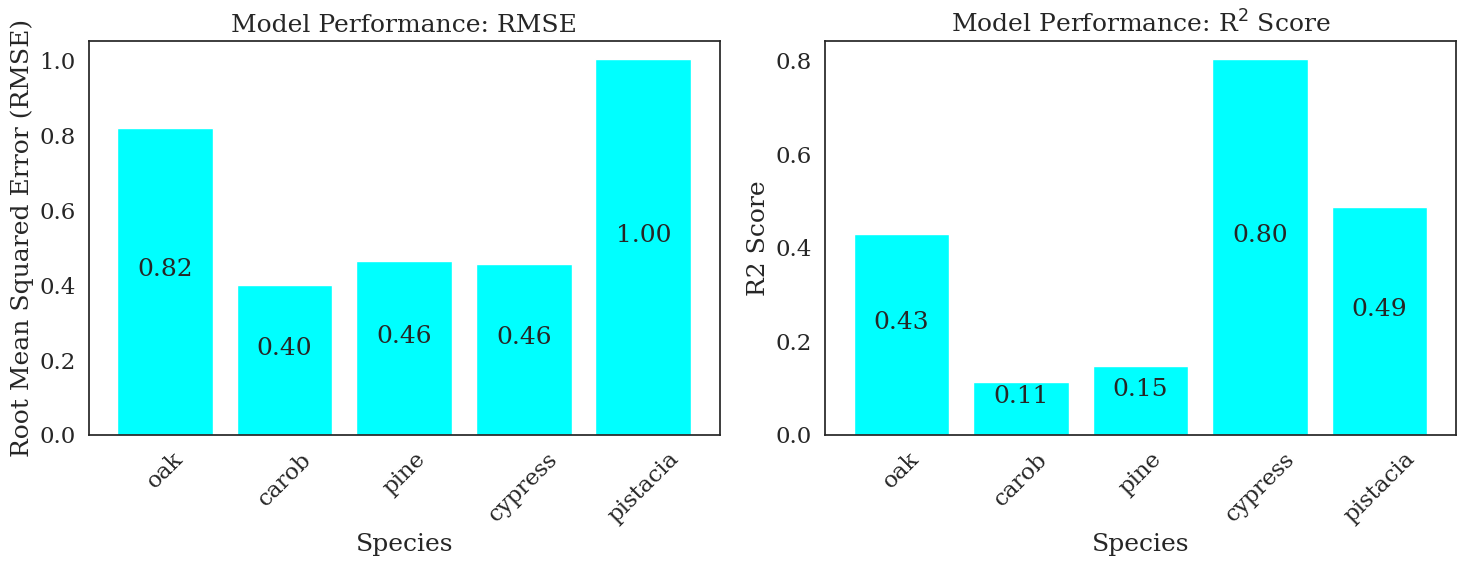

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the MSE values for English_name
mse_plot = axes[0].bar(names_english_name, rmse_values_english_name,color="cyan")
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')
axes[0].set_title('Model Performance: RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Add text values for MSE - English Name
for rect in mse_plot:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Plot the R2 values for English_name
r2_plot = axes[1].bar(names_english_name, r2_values_english_name,color="cyan")
axes[1].set_xlabel('Species')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('Model Performance: R$^2$ Score')
axes[1].tick_params(axis='x', rotation=45)

# Add text values for R2 - English Name
for rect in r2_plot:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2, height/2, f'{height:.2f}', ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()